# 📌 이상치를 월, 시간 기준으로 중앙값으로 대체하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rc('axes', unicode_minus=False)

global_font = {'family': 'AppleGothic', 'size' : 10, 'weight': 'bold'}

# 폰트 설정
mpl.rc('font', **global_font)
# mpl.rc('font', family = 'AppleGothic', size = 23, weoght : 'bold) => unpacking으로 설정을 변경 가능

### 1.데이터 불러오기

In [3]:
df = pd.read_csv("../data/data_fin.csv", index_col=0)
df.shape

(52584, 29)

In [4]:
test_df = df[df["Year"] == 2023]

df = df[df["Year"] < 2023]
df.shape

(43824, 29)

### 2.탐색적 데이터 분석(EDA) 진행하기

#### 2.1 데이터셋 확인

In [5]:
df.head()

Datetime        Date  Year  Month  Day  Hour  Rent Bike Count  \
0  2018-01-01 00:00:00  2018-01-01  2018      1    1     0              268   
1  2018-01-01 01:00:00  2018-01-01  2018      1    1     1              304   
2  2018-01-01 02:00:00  2018-01-01  2018      1    1     2              228   
3  2018-01-01 03:00:00  2018-01-01  2018      1    1     3              148   
4  2018-01-01 04:00:00  2018-01-01  2018      1    1     4               85   

   Temperature(°C)  Average temperature per minute(°C)  \
0             -3.2                                -2.9   
1             -3.3                                -3.3   
2             -3.7                                -3.4   
3             -4.0                                -3.8   
4             -4.2                                -4.0   

   Highest temperature per minute(°C)  ...  Maximum humidity per minute(%)  \
0                                -2.6  ...                            41.6   
1                                -3.2  ...                            41.6   
2                                -3.2  ...                            45.9   
3                                -3.8  ...                            46.6   
4                                -3.9  ...                            52.7   

   Minimum humidity per minute(%)  Atmospheric Pressure(hPa)  \
0                            41.6                     1015.4   
1                            41.6                     1015.1   
2                            45.9                     1015.2   
3                            46.6                     1015.5   
4                            52.7                     1015.5   

   Average atmospheric pressure(hPa)  Highest atmospheric pressure(hPa)  \
0                             1015.2                             1015.4   
1                             1015.3                             1015.5   
2                             1015.0                             1015.2   
3                             1015.4                             1015.6   
4                             1015.5                             1015.5   

   Minimum atmospheric pressure(hPa)  Seasons  Day of Week   Weekend  Holiday  
0                             1015.1   Winter       Monday  Weekdays  Holiday  
1                             1015.1   Winter       Monday  Weekdays  Holiday  
2                             1014.9   Winter       Monday  Weekdays  Holiday  
3                             1015.2   Winter       Monday  Weekdays  Holiday  
4                             1015.5   Winter       Monday  Weekdays  Holiday  

[5 rows x 29 columns]

#### 2.2 데이터셋 컬럼 확인

In [6]:
df.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day', 'Hour', 'Rent Bike Count',
       'Temperature(°C)', 'Average temperature per minute(°C)',
       'Highest temperature per minute(°C)',
       'Lowest temperature per minute(°C)', 'Rainfall(mm)', 'Wind Direction',
       'Maximum wind direction per minute(deg)', 'Wind Speed(m/s)',
       'Average wind speed per minute(m/s)',
       'Maximum wind speed per minute(m/s)', 'Relative Humidity(%)',
       'Average humidity per minute(%)', 'Maximum humidity per minute(%)',
       'Minimum humidity per minute(%)', 'Atmospheric Pressure(hPa)',
       'Average atmospheric pressure(hPa)',
       'Highest atmospheric pressure(hPa)',
       'Minimum atmospheric pressure(hPa)', 'Seasons', 'Day of Week',
       'Weekend', 'Holiday'],
      dtype='object')

#### 2.3 기초통계량 확인

In [7]:
df[['Rainfall(mm)', 'Wind Direction', 'Wind Speed(m/s)','Relative Humidity(%)','Atmospheric Pressure(hPa)']].describe()

Rainfall(mm)  Wind Direction  Wind Speed(m/s)  Relative Humidity(%)  \
count  43824.000000    43824.000000     43824.000000          43824.000000   
mean       0.170320      193.024318         2.149071             61.525945   
std        1.275088      110.382328         1.144236             19.918387   
min        0.000000        0.000000         0.000000             10.000000   
25%        0.000000       70.000000         1.300000             46.000000   
50%        0.000000      230.000000         2.000000             62.000000   
75%        0.000000      290.000000         2.800000             77.000000   
max       64.700000      360.000000         9.100000            100.000000   

       Atmospheric Pressure(hPa)  
count               43824.000000  
mean                 1006.173286  
std                     8.182717  
min                   975.200000  
25%                   999.800000  
50%                  1006.400000  
75%                  1012.500000  
max                  1028.300000

In [8]:
df.describe()

Year         Month           Day          Hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000   
mean    2020.000000      6.523549     15.727820     11.500000   
std        1.413842      3.448572      8.799425      6.922266   
min     2018.000000      1.000000      1.000000      0.000000   
25%     2019.000000      4.000000      8.000000      5.750000   
50%     2020.000000      7.000000     16.000000     11.500000   
75%     2021.000000     10.000000     23.000000     17.250000   
max     2022.000000     12.000000     31.000000     23.000000   

       Rent Bike Count  Temperature(°C)  Average temperature per minute(°C)  \
count     43824.000000     43824.000000                        43824.000000   
mean        613.694072        13.378430                           13.343451   
std         259.954745        10.980713                           10.955257   
min           0.000000       -18.500000                          -18.300000   
25%         520.000000         4.800000                            4.800000   
50%         708.000000        14.300000                           14.200000   
75%         806.000000        22.700000                           22.600000   
max         900.000000        39.400000                           39.300000   

       Highest temperature per minute(°C)  Lowest temperature per minute(°C)  \
count                        43824.000000                       43824.000000   
mean                            13.761555                          13.005864   
std                             10.991016                          10.963140   
min                            -18.200000                         -18.600000   
25%                              5.200000                           4.500000   
50%                             14.700000                          13.800000   
75%                             23.000000                          22.300000   
max                             39.600000                          39.200000   

       Rainfall(mm)  ...  Average wind speed per minute(m/s)  \
count  43824.000000  ...                        43824.000000   
mean       0.170320  ...                            2.096495   
std        1.275088  ...                            1.074015   
min        0.000000  ...                            0.000000   
25%        0.000000  ...                            1.300000   
50%        0.000000  ...                            1.900000   
75%        0.000000  ...                            2.700000   
max       64.700000  ...                            8.700000   

       Maximum wind speed per minute(m/s)  Relative Humidity(%)  \
count                        43824.000000          43824.000000   
mean                             3.651036             61.525945   
std                              1.637883             19.918387   
min                              0.000000             10.000000   
25%                              2.500000             46.000000   
50%                              3.400000             62.000000   
75%                              4.600000             77.000000   
max                             17.300000            100.000000   

       Average humidity per minute(%)  Maximum humidity per minute(%)  \
count                    43824.000000                    43824.000000   
mean                        61.424363                       63.849697   
std                         19.846633                       19.507761   
min                         10.900000                       11.900000   
25%                         46.300000                       49.200000   
50%                         61.500000                       64.100000   
75%                         77.300000                       79.500000   
max                         99.900000                      100.000000   

       Minimum humidity per minute(%)  Atmospheric Pressure(hPa)  \
count                    43824.000000               43824.000000   
mean                 

#### 2.4 데이터 타입 확인

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 0 to 43823
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Datetime                                43824 non-null  object 
 1   Date                                    43824 non-null  object 
 2   Year                                    43824 non-null  int64  
 3   Month                                   43824 non-null  int64  
 4   Day                                     43824 non-null  int64  
 5   Hour                                    43824 non-null  int64  
 6   Rent Bike Count                         43824 non-null  int64  
 7   Temperature(°C)                         43824 non-null  float64
 8   Average temperature per minute(°C)      43824 non-null  float64
 9   Highest temperature per minute(°C)      43824 non-null  float64
 10  Lowest temperature per minute(°C)       43824 non-null  fl

#### 2.5 데이터 시각화

##### 2.5.1 연도, 월, 일, 시간별 대여건수
- 2019, 2020년이 가장 많이 대여를 했고, 2018,2022년 가장 적게 대여했다는 것을 알 수 있음
- 7, 9, 10, 11월이 많이 대여를 했고, 1월, 8월이 가장 적게 대여했다는 것을 알 수 있음
- 일 기준으로는 큰 차이가 없다는 것으로 볼 수 있음
- 시간은 새벽(3~5)시간대가 가장 적고, 오후(11~15)시간대가 많은 대여를 하고 있다는 것을 알 수 있음

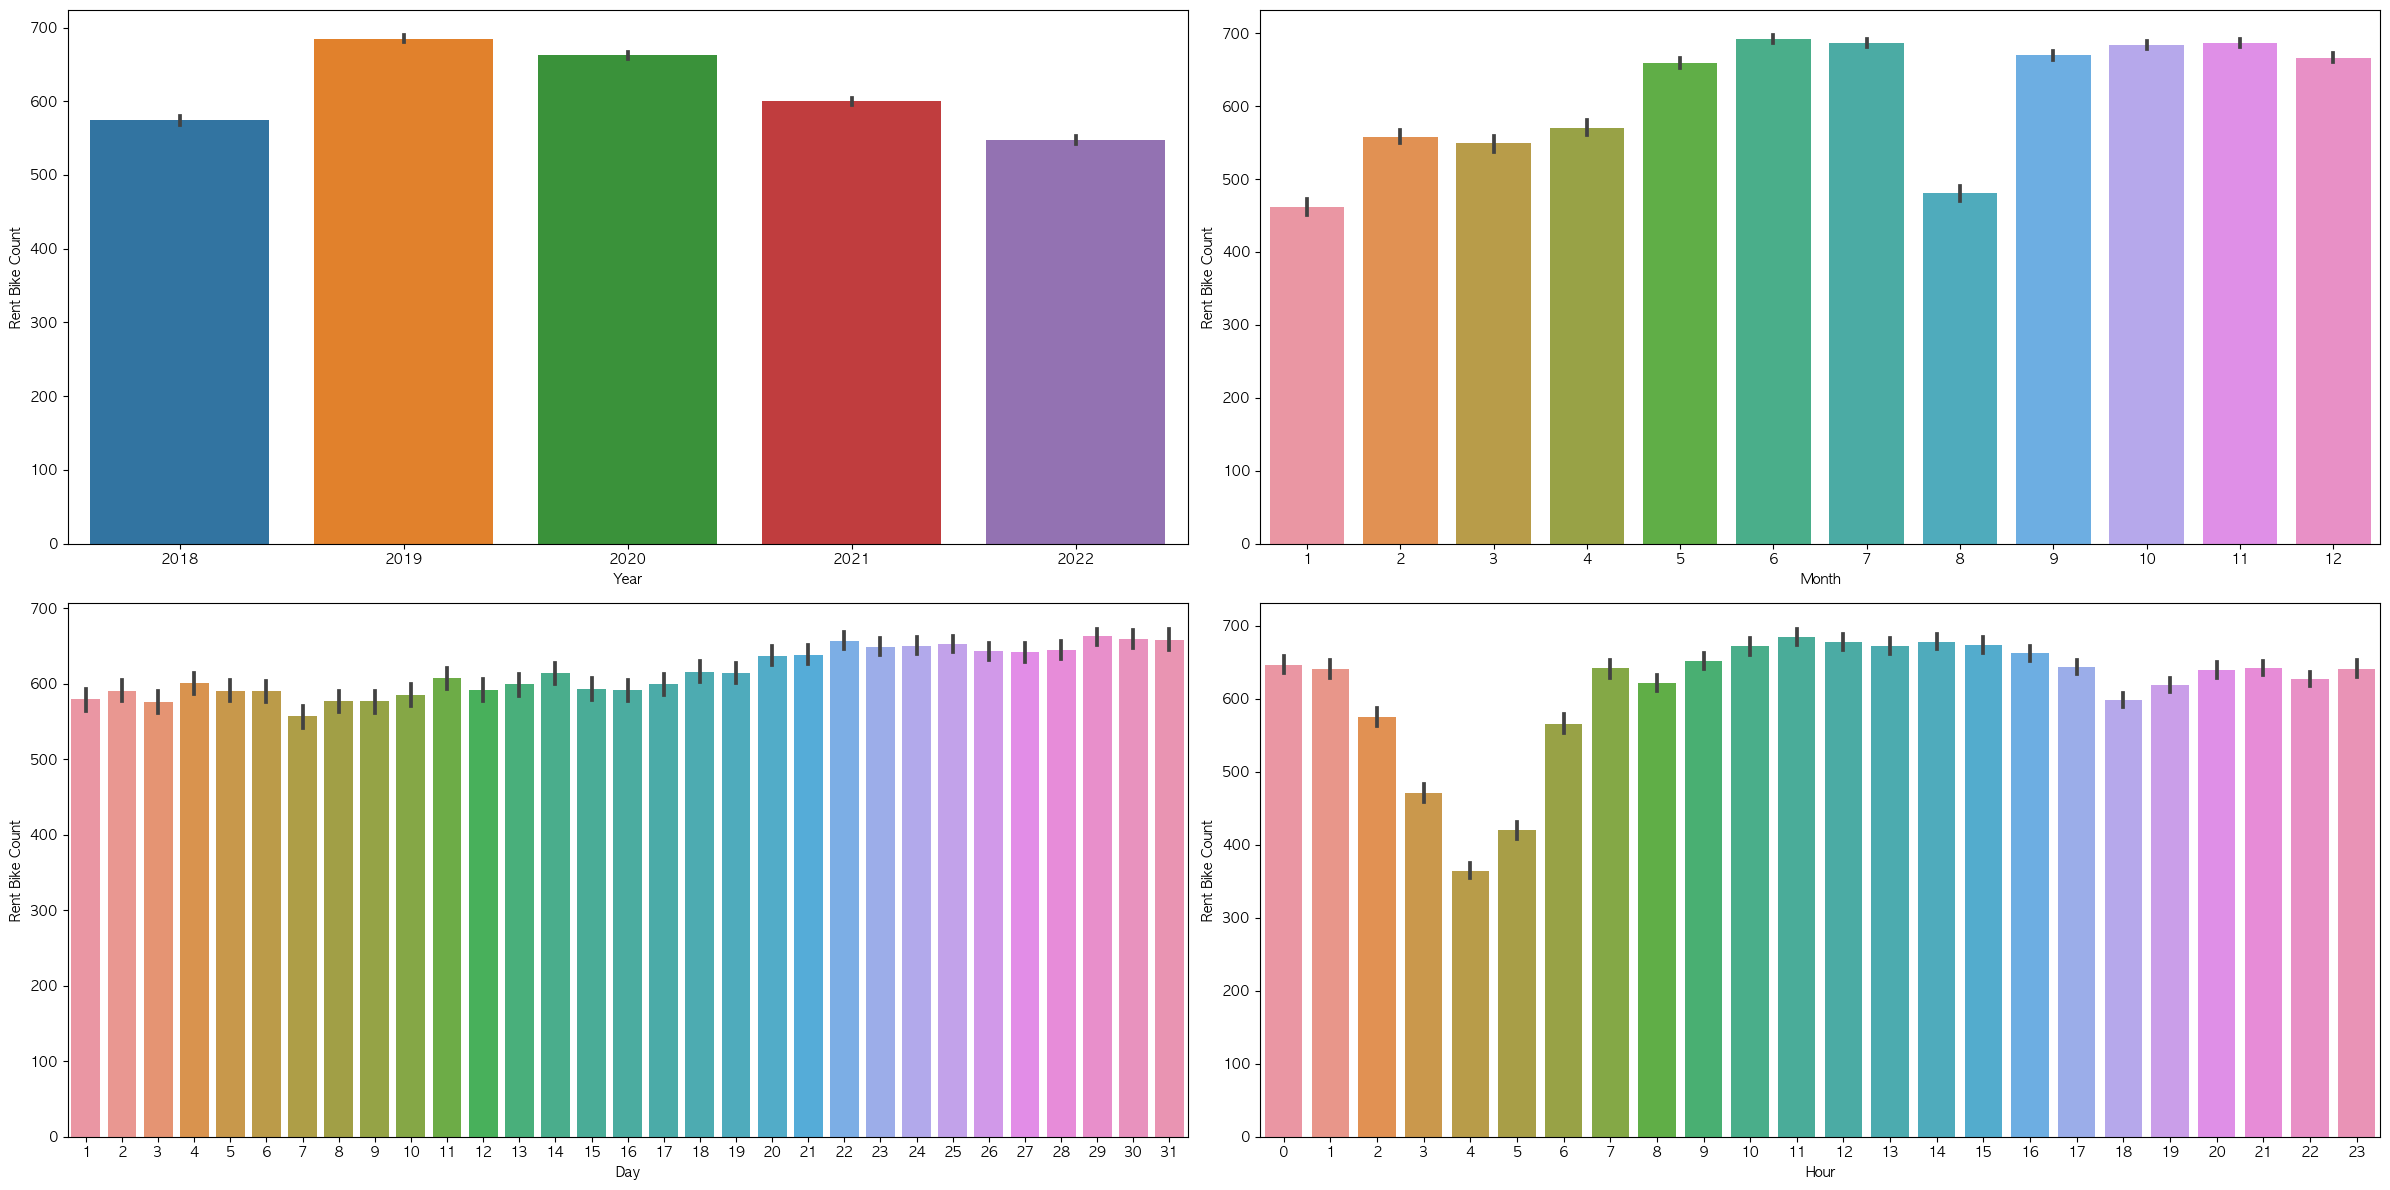

In [10]:
# 연도, 월, 일, 시간별 대여건수
fig, axes = plt.subplots(2, 2, figsize=(24,12))
cat_features = ["Year", "Month", "Day", "Hour"]

for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    sns.barplot(x=feature, y="Rent Bike Count", data=df, ax=axes[row, col])

plt.tight_layout()
plt.show()

##### 2.5.2 계절, 요일, 주중 및 주말, 공휴일 여부 별 대여건수
- 가을에 많이 대여를 하고 있고, 겨울에 적게 대여하고 있다는 것을 볼 수 있음
- 요일과 주중 및 주말에 따라 대여건수가 크게 차이가 없다는 것을 알 수 있음
- 공휴일 여부는 휴일이 아닌 날에 좀더 많이 대여를 하고 있다는 것을 알 수 있음

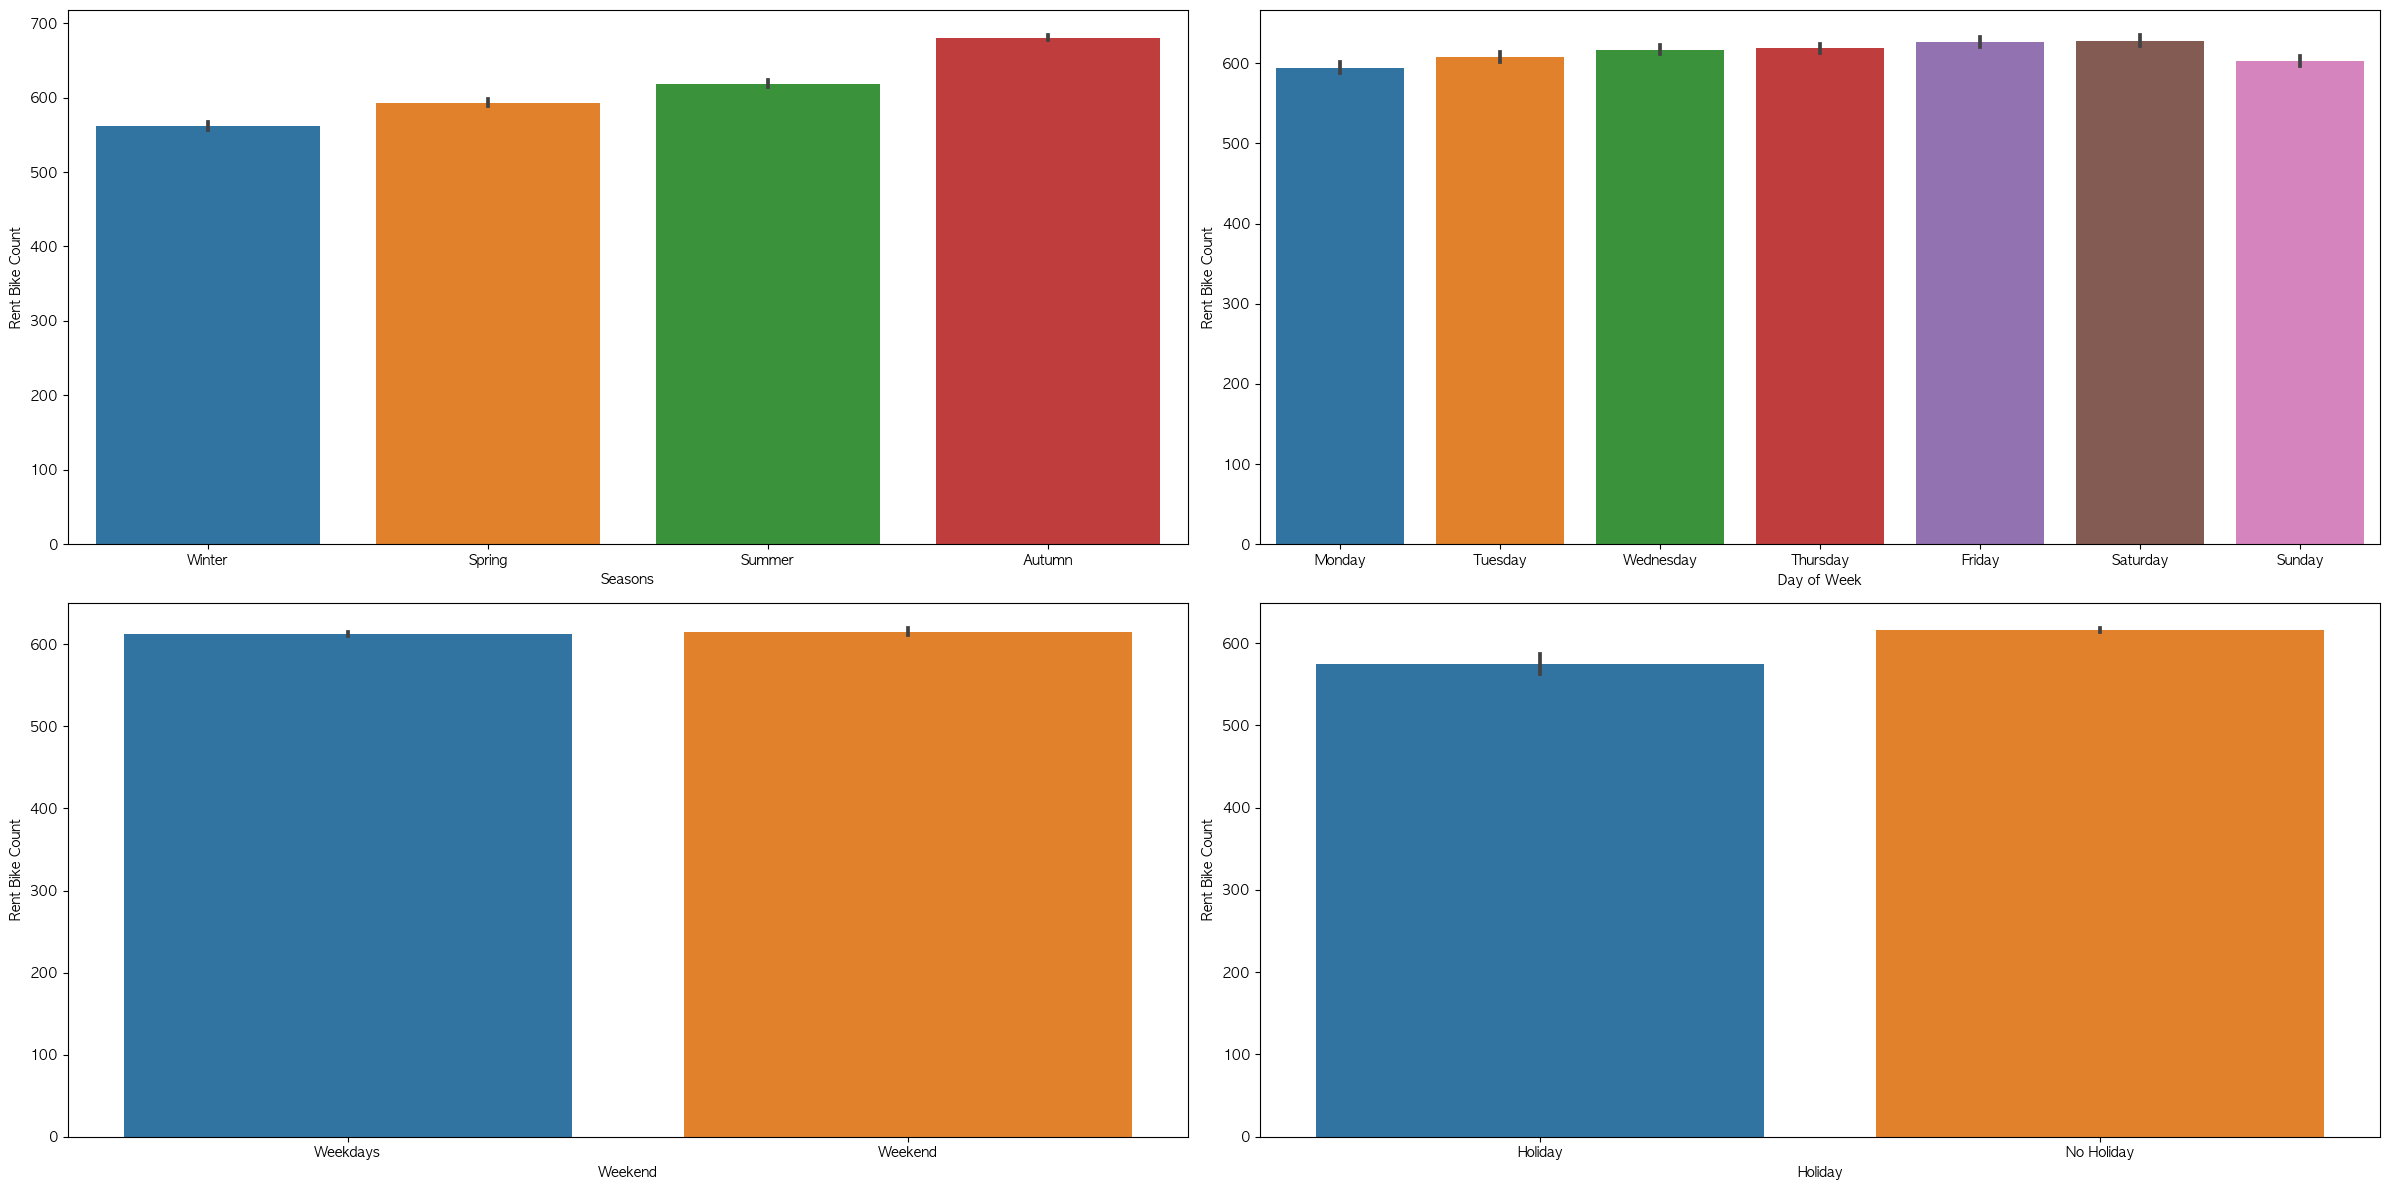

In [11]:
# 계절, 요일, 주중 및 주말, 공휴일 여부 별 대여건수
fig, axes = plt.subplots(2, 2, figsize=(24,12))
cat_features = ["Seasons", "Day of Week", "Weekend", "Holiday"]

for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    sns.barplot(x=feature, y="Rent Bike Count", data=df, ax=axes[row, col])

plt.tight_layout()
plt.show()

##### 2.5.3 전체 대여수, 계절별, 시간대별, 공휴일 여부에 따른 대여수
- 전체 대여수 데이터에 이상치가 있다는 것을 알 수 있음
- 계절, 시간, 공휴일 여부 데이터에서도 이상치가 있는 것으로 보여 이상치 처리 후, 다시 시각화를 해야 함.

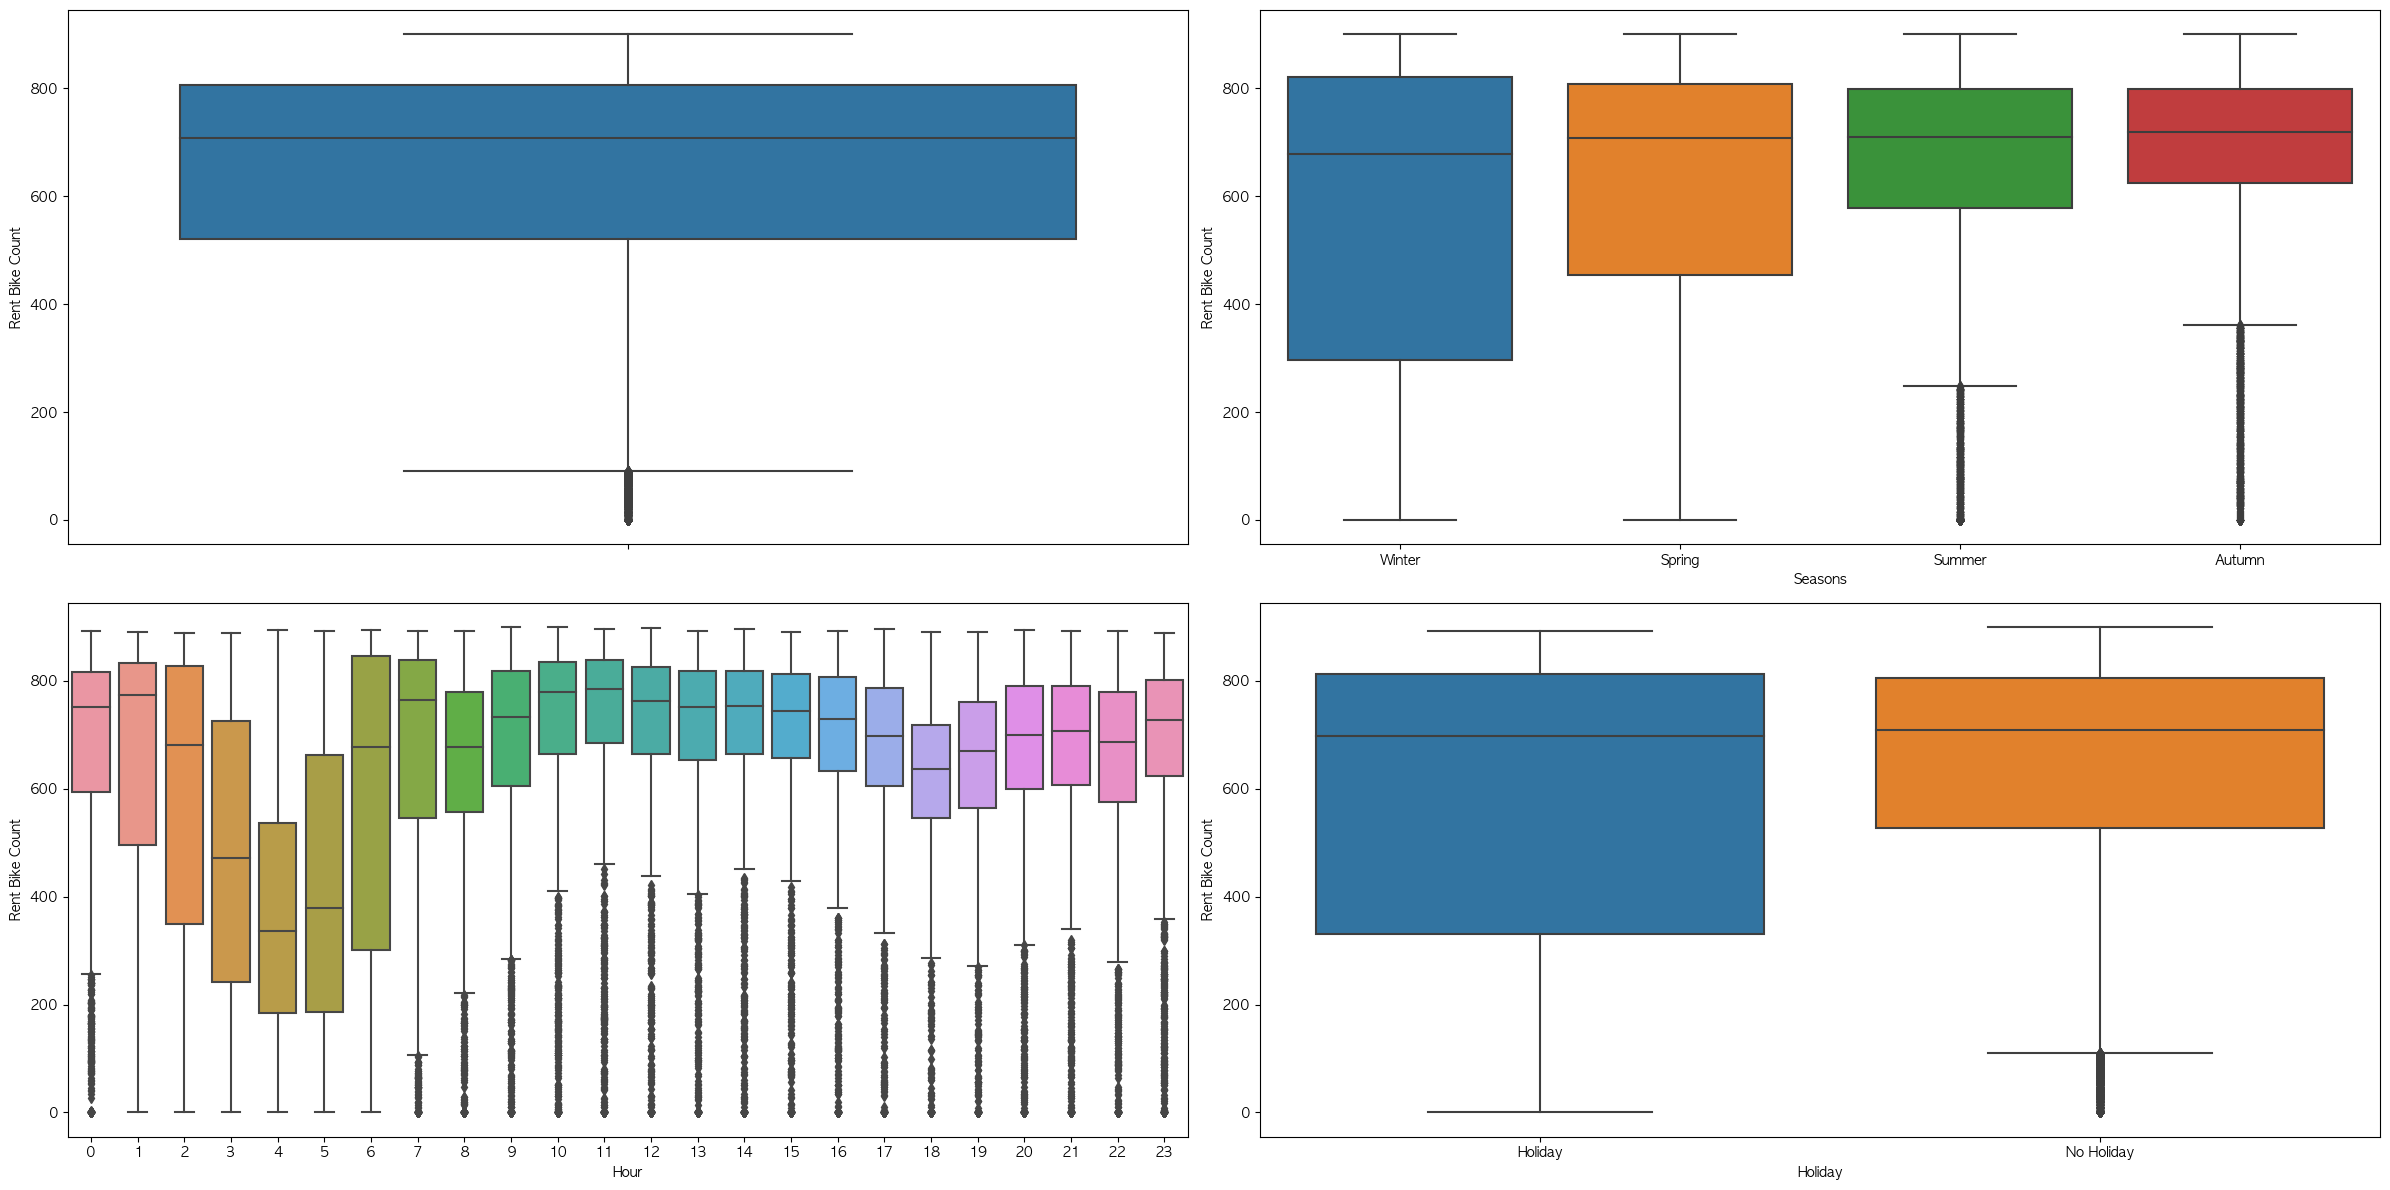

In [12]:
# 전체 대여수, 계절별, 시간대별, 공휴일 여부에 따른 대여수
fig, axes = plt.subplots (nrows=2, ncols=2)
fig.set_size_inches (24, 12)

sns.boxplot(data=df, y="Rent Bike Count", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="Rent Bike Count", x="Seasons", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="Rent Bike Count", x="Hour", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="Rent Bike Count", x="Holiday",orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Rent Bike Count')
axes[0][1].set(xlabel='Seasons', ylabel='Rent Bike Count')
axes[1][0].set(xlabel='Hour', ylabel='Rent Bike Count')
axes[1][1].set(xlabel='Holiday', ylabel='Rent Bike Count')

plt.tight_layout()
plt.show()

##### 2.5.4 날씨에 따른 시간대별 대여수

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


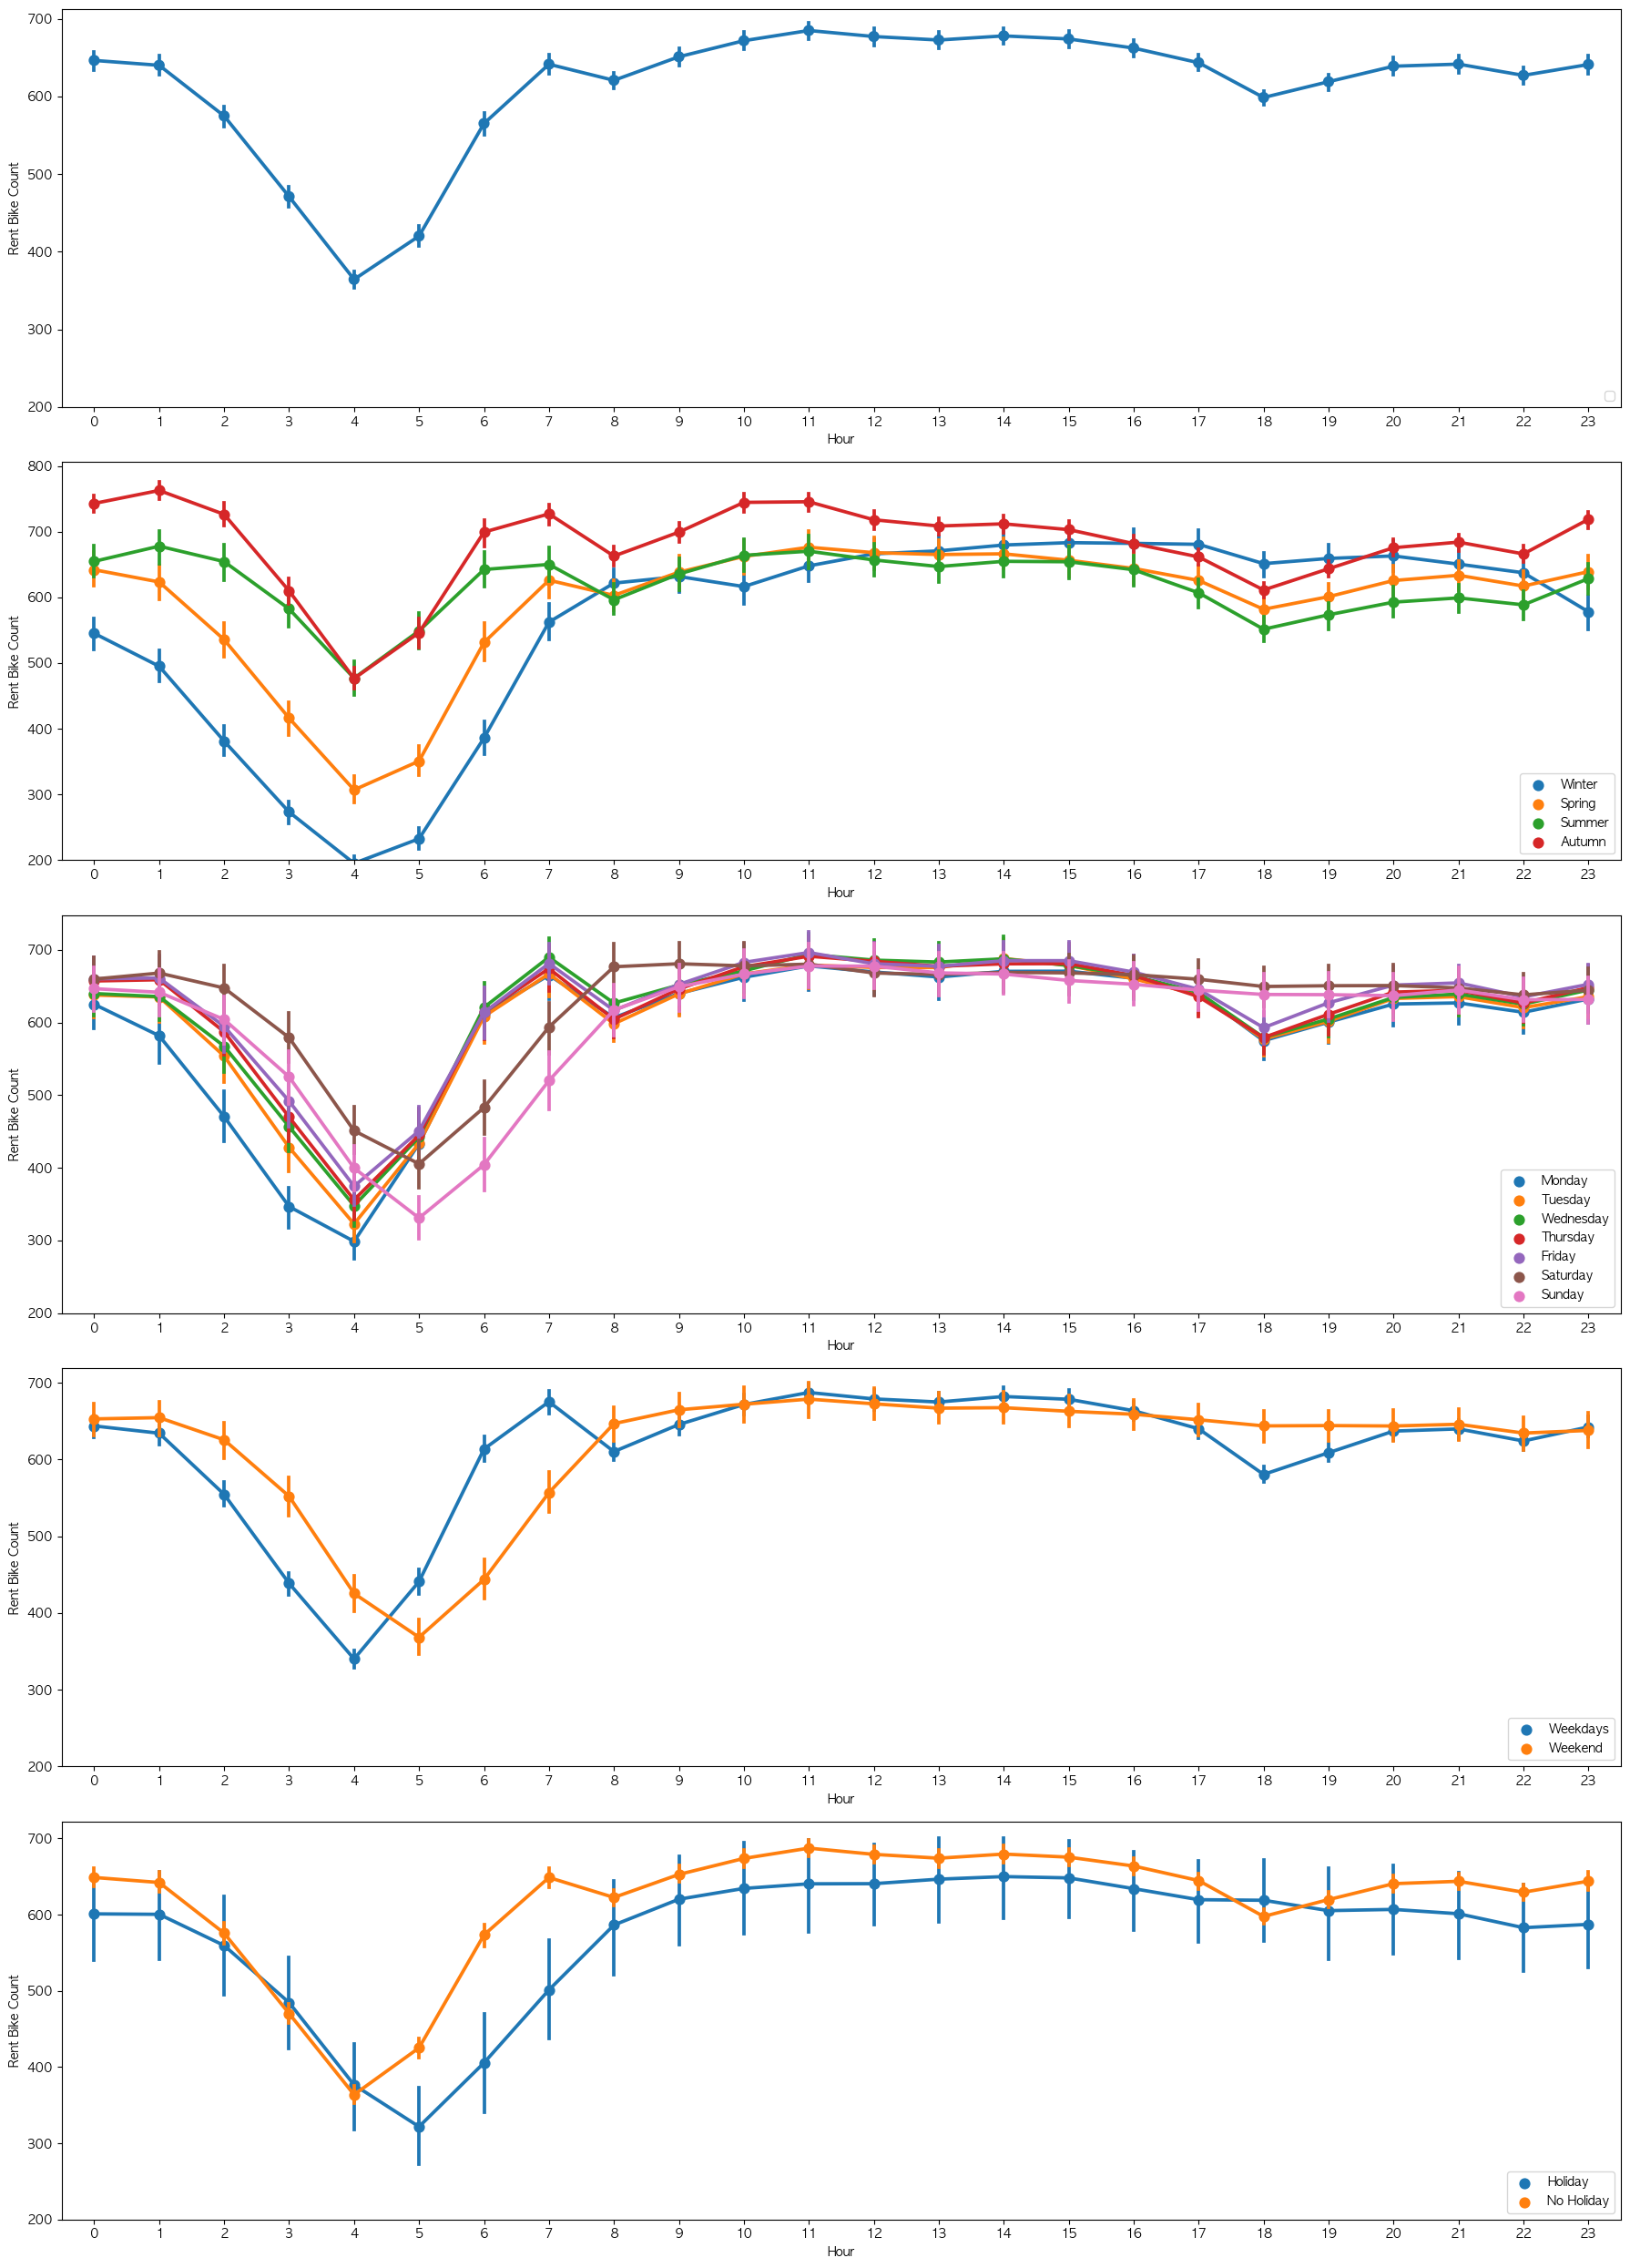

In [13]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=df, x="Hour", y="Rent Bike Count", ax=ax1)
sns.pointplot(data=df, x="Hour", y="Rent Bike Count", hue="Seasons", ax=ax2)
sns.pointplot(data=df, x="Hour", y="Rent Bike Count", hue="Day of Week", ax=ax3)
sns.pointplot(data=df, x="Hour", y="Rent Bike Count", hue="Weekend", ax=ax4)
sns.pointplot(data=df, x="Hour", y="Rent Bike Count", hue="Holiday", ax=ax5)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_ylim(bottom=200)
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 2.6 상관관계 시각화

##### 2.6.1 Heatmap()
- 기온과 분당 평균기온, 분당 최고기온, 분당 최저기온 간에는 상관관계가 높아 같이 피처로 사용하기에 적합하지 않다.
- 풍향과 분당 최다 풍향, 풍속과 분당 평균풍속, 분당 최대풍속 간에는 상관관계가 높아 같이 피처로 사용하기에 적합하지 않다.
- 상대습도와 분당 평균습도, 분당 최대습도, 분당 최저습도 간에는 상관관계가 높아 같이 피처로 사용하기에 적합하지 않다.
- 기압과 분당 평균기압, 분당 최고기압, 분당 최저기압 간에는 상관관계가 높아 같이 피처로 사용하기에 적합하지 않다.

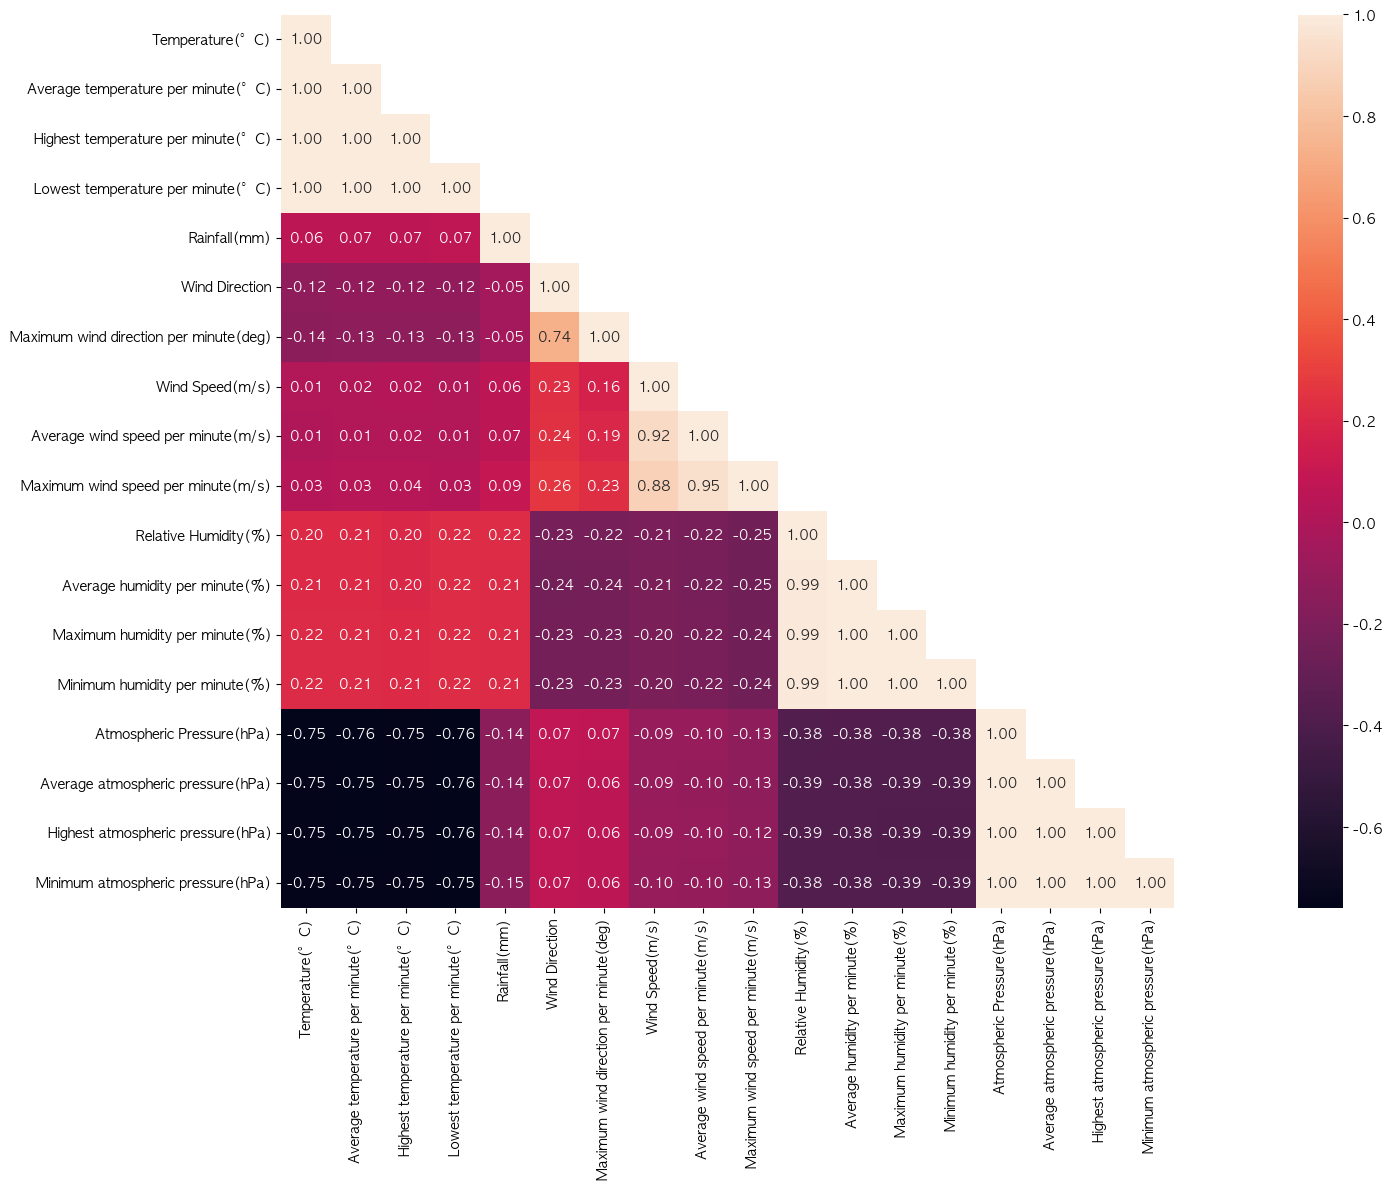

In [14]:
corr_df = df[['Temperature(°C)', 'Average temperature per minute(°C)',
       'Highest temperature per minute(°C)',
       'Lowest temperature per minute(°C)', 'Rainfall(mm)', 'Wind Direction',
       'Maximum wind direction per minute(deg)', 'Wind Speed(m/s)',
       'Average wind speed per minute(m/s)',
       'Maximum wind speed per minute(m/s)', 'Relative Humidity(%)',
       'Average humidity per minute(%)', 'Maximum humidity per minute(%)',
       'Minimum humidity per minute(%)', 'Atmospheric Pressure(hPa)',
       'Average atmospheric pressure(hPa)',
       'Highest atmospheric pressure(hPa)',
       'Minimum atmospheric pressure(hPa)']]
corr_df = corr_df.corr()
mask = np.array(corr_df)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(25,12)
sns.heatmap(corr_df, mask=mask, annot=True, square=True, fmt='.2f')

plt.tight_layout()
plt.show()

##### 2.6.1 Regplot()
- 기온은 온도가 증가할수록 대여건수가 증가한다는 것을 알 수 있다.
- 강수량은 강한 음의 상관관계를 가지고 있다는 것을 알 수 있다.
- 풍속, 기압은 상관관계를 가지고 있다고 볼 수 없다.
- 상대습도는 습도가 증가할수록 대여건수가 감소하는 음의 상관관계를 가지는 것을 알 수 있다.

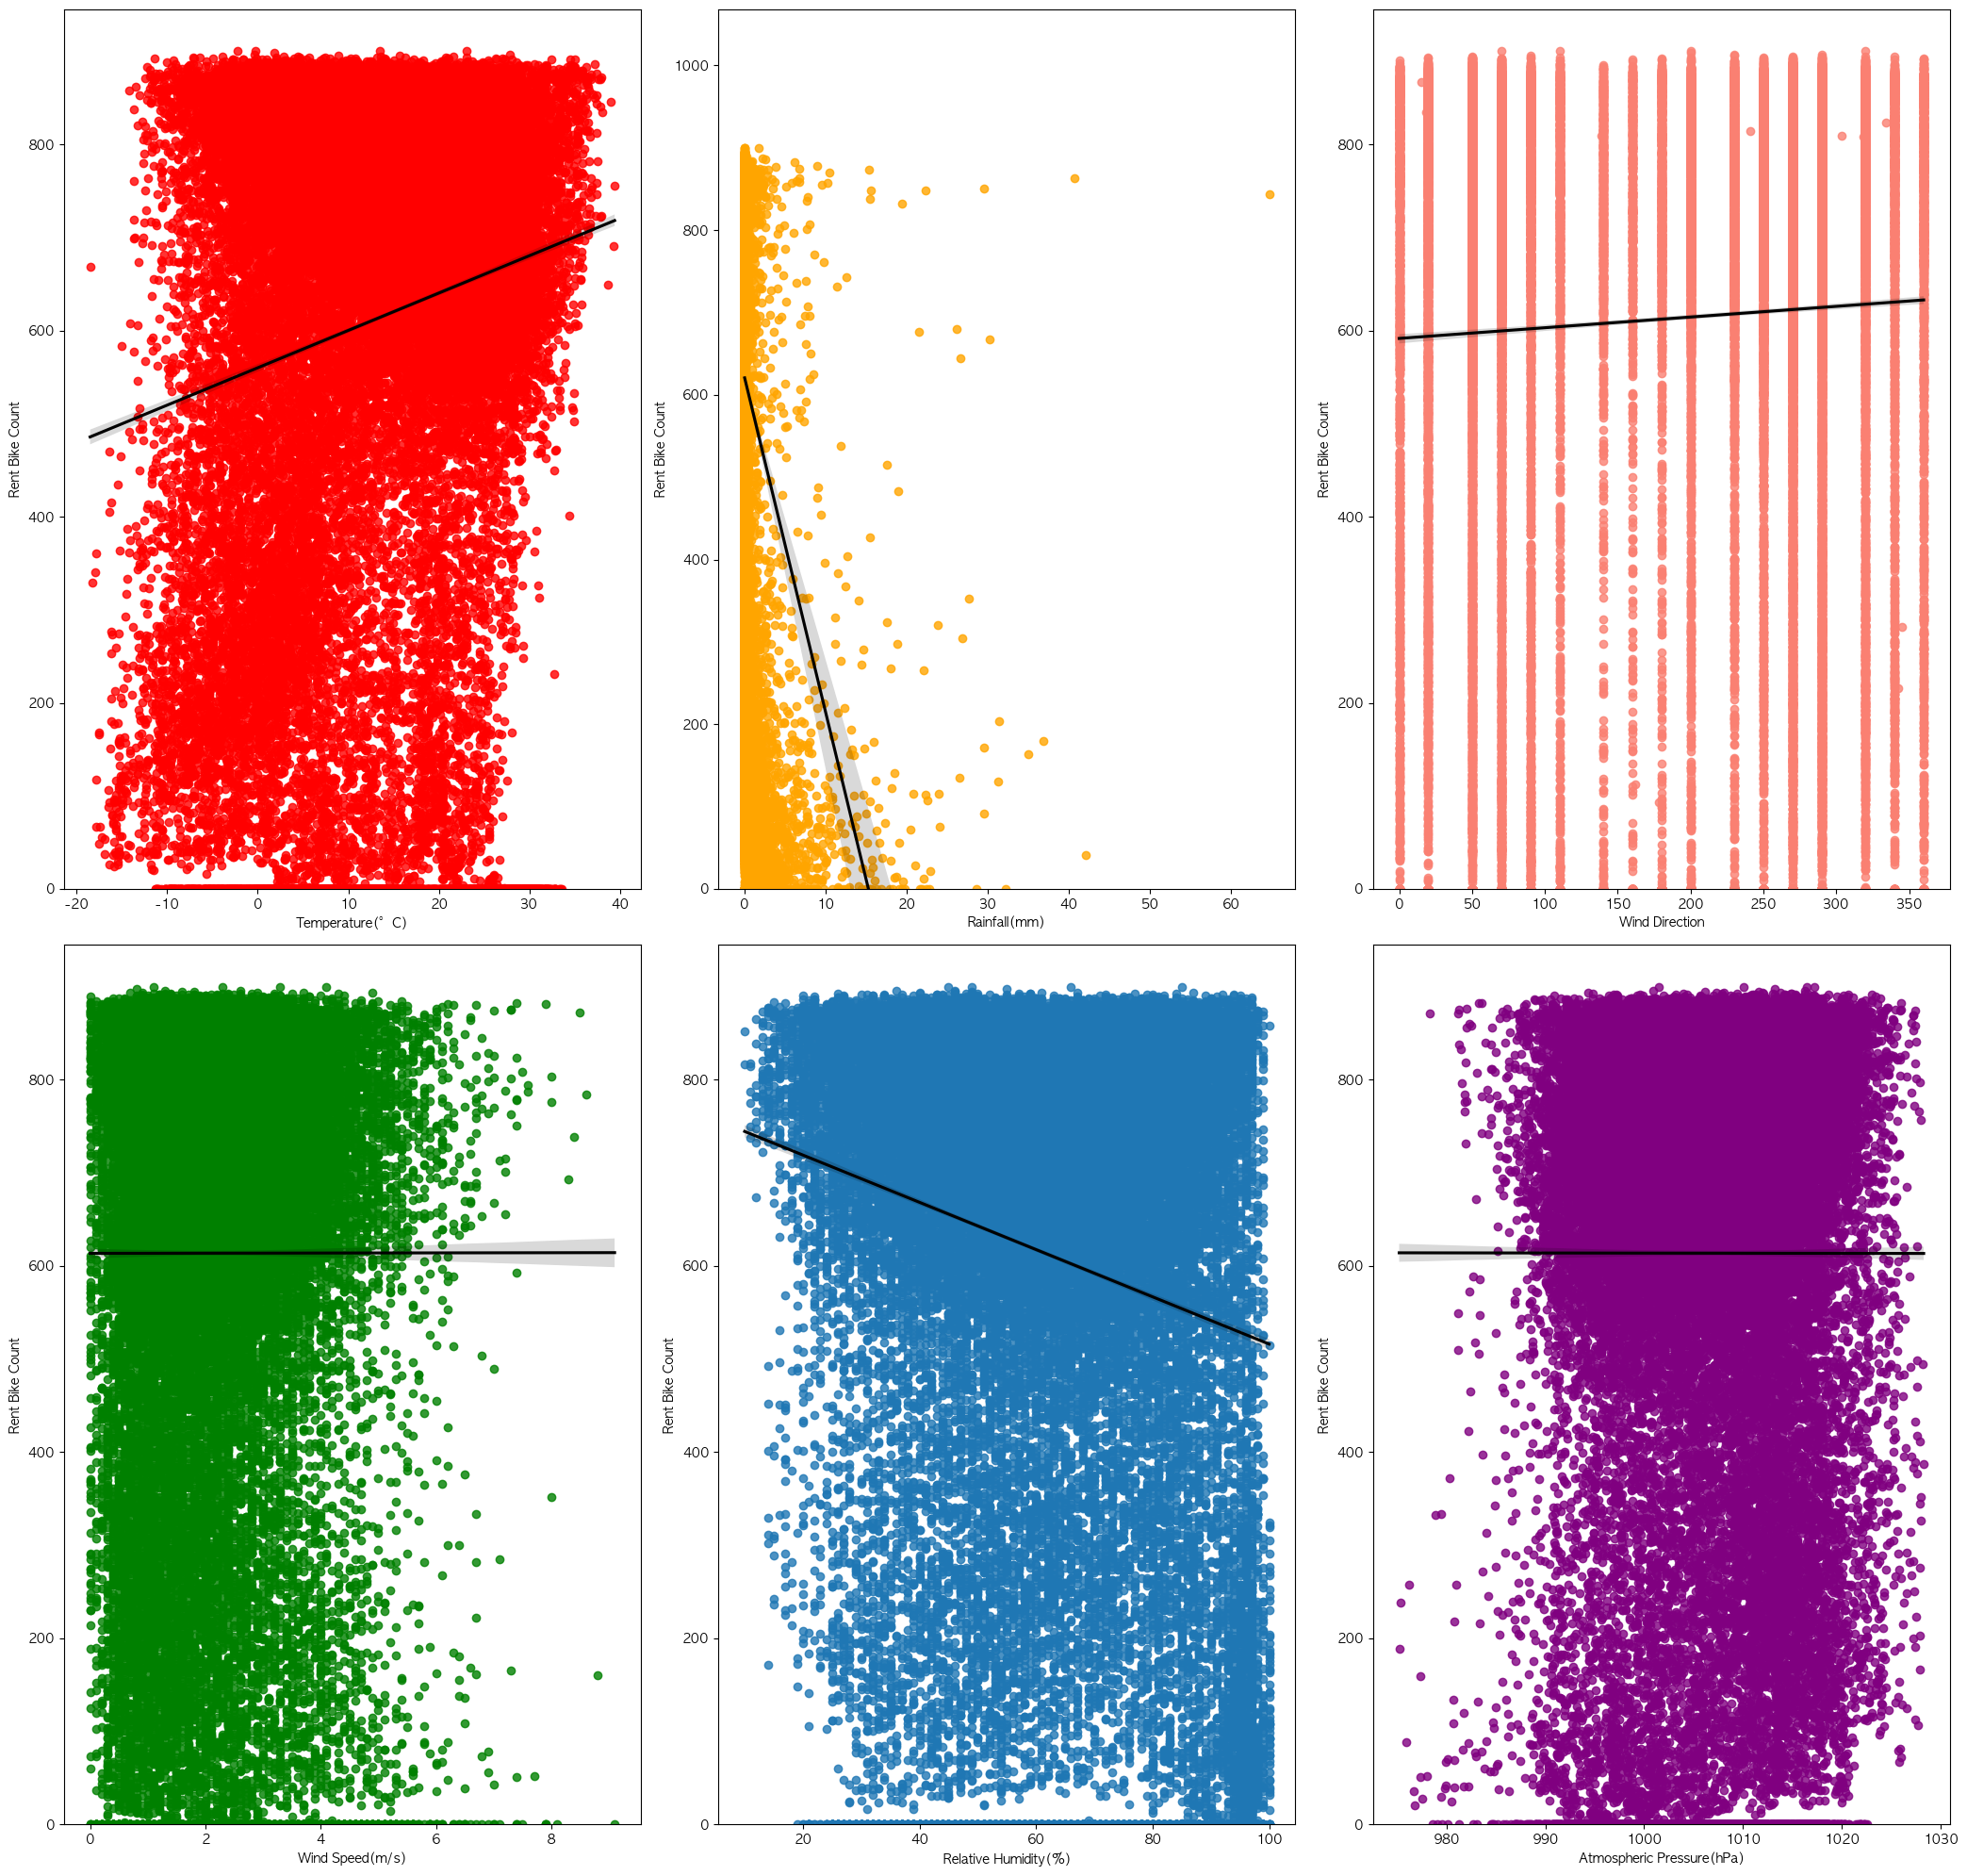

In [15]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(21,20)

sns.regplot(x="Temperature(°C)", y="Rent Bike Count", data=df, ax=ax1, color="Red", line_kws={"color": "Black"})
sns.regplot(x="Rainfall(mm)", y="Rent Bike Count", data=df, ax=ax2, color="Orange", line_kws={"color": "Black"})
sns.regplot(x="Wind Direction", y="Rent Bike Count", data=df, ax=ax3, color="Salmon", line_kws={"color": "Black"})
sns.regplot(x="Wind Speed(m/s)", y="Rent Bike Count", data=df, ax=ax4, color="Green", line_kws={"color": "Black"})
sns.regplot(x="Relative Humidity(%)", y="Rent Bike Count", data=df, ax=ax5, line_kws={"color": "Black"})
sns.regplot(x="Atmospheric Pressure(hPa)", y="Rent Bike Count", data=df, ax=ax6, color="Purple", line_kws={"color": "Black"})

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_ylim(0, None)

plt.tight_layout()
plt.show()

#### 2.7 이상치 확인 

##### 2.7.1 전체 대여건수에서의 이상치 확인

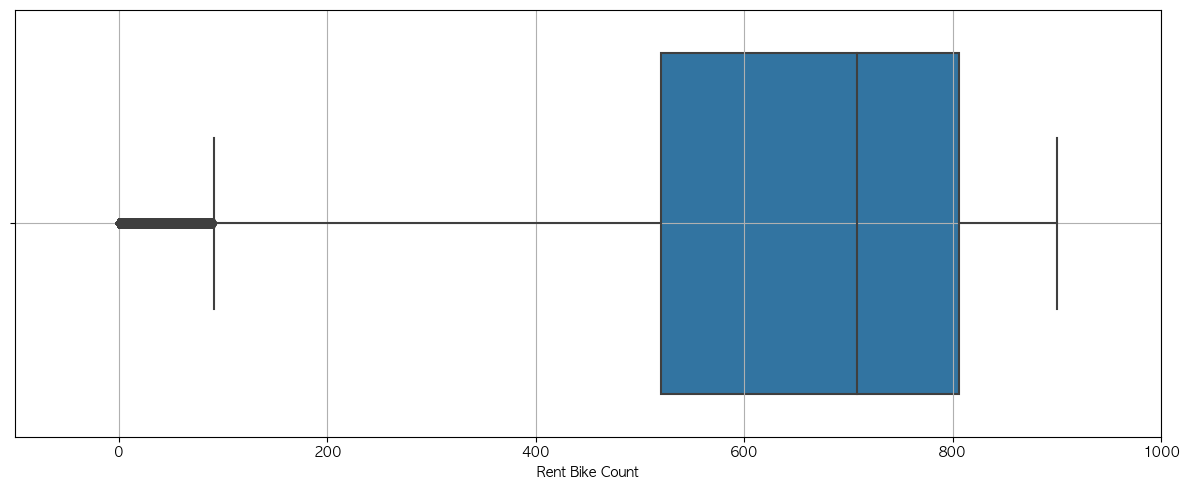

In [16]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="Rent Bike Count", orient="h")
plt.xlim(-100, 1000)
plt.grid(True)

plt.tight_layout()
plt.show()

In [17]:
# "Rent Bike Count" 데이터에서 전체의 25%에 해당하는 데이터 조회
count_q1 = np.percentile(df["Rent Bike Count"], 25)
print(count_q1)

# "Rent Bike Count" 데이터에서 전체의 75%에 해당하는 데이터 조회
count_q3 = np.percentile(df["Rent Bike Count"], 75)
print(count_q3)

# IQR = Q3 - Q1
count_IQR = count_q3 - count_q1
print(count_IQR)

# 이상치를 제외한(이상치가 아닌 구간에 있는) 데이터만 조회
df_fin = df[(df["Rent Bike Count"] >= (count_q1 - (1.5 * count_IQR))) & (df['Rent Bike Count'] <= (count_q3 + (1.5 * count_IQR)))]
print(df_fin.shape)

outlier_df = df[(df["Rent Bike Count"] < (count_q1 - (1.5 * count_IQR))) | (df['Rent Bike Count'] > (count_q3 + (1.5 * count_IQR)))]
print(outlier_df.shape)

520.0
806.0
286.0
(40162, 29)
(3662, 29)


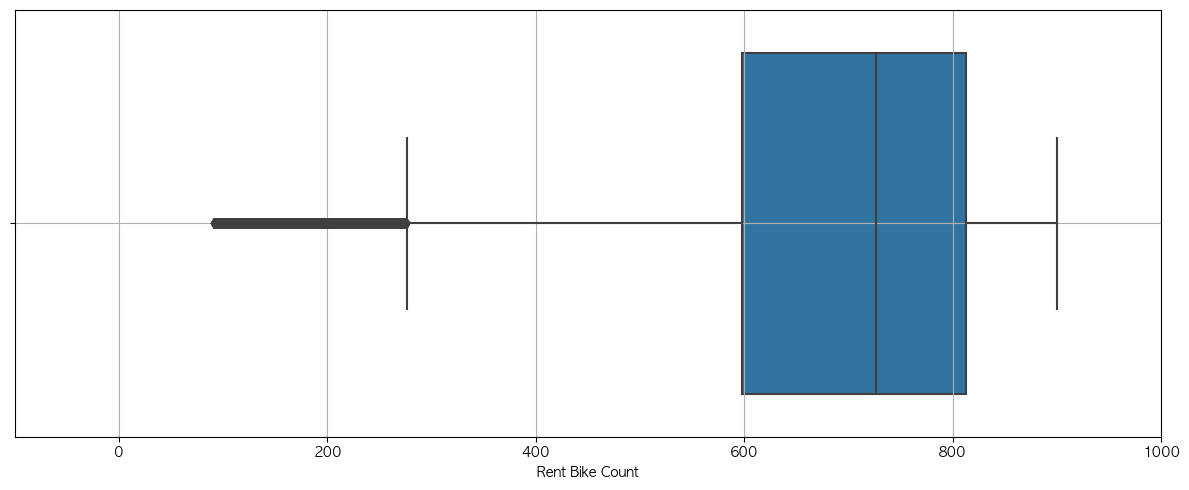

In [18]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_fin, x="Rent Bike Count", orient="h")
plt.xlim(-100, 1000)
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
# 이상치를 월, 시간 기준으로 중앙값으로 채우는 함수
def fill_outlier(outlier, non_outlier):
    count_list = []

    for i in range(len(outlier)):
        month = outlier.iloc[i]["Month"]
        hour = outlier.iloc[i]["Hour"]
    
        median_value = non_outlier[(non_outlier["Month"] == month) & (non_outlier["Hour"] == hour)]["Rent Bike Count"].median()
        count_list.append(median_value)

    return count_list

In [20]:
outlier_df["Rent Bike Count"] = fill_outlier(outlier_df, df_fin)

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_18088/243883797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df["Rent Bike Count"] = fill_outlier(outlier_df, df_fin)


In [21]:
train_df = pd.concat([df_fin, outlier_df], axis=0, ignore_index=True)

train_df.sort_values(by=["Datetime"], axis=0, ascending=True, inplace=True)

train_df.reset_index(inplace=True, drop=True)

In [22]:
# # 훈련할 데이터를 train_data, 다시 예측할 데이터를 test_data
# train_df.to_csv("../data/train_data/train_data(2018_2022).csv")
# test_df.to_csv("../data/test_data/test_data(2023).csv")

### 3.이상치 제거한 데이터를 EDA 진행하기

#### 3.1 기초통계량 확인

In [54]:
train_df[['Rainfall(mm)', 'Wind Direction', 'Wind Speed(m/s)','Relative Humidity(%)','Atmospheric Pressure(hPa)']].describe()

Rainfall(mm)  Wind Direction  Wind Speed(m/s)  Relative Humidity(%)  \
count  43824.000000    43824.000000     43824.000000          43824.000000   
mean       0.170320      193.024318         2.149071             61.525945   
std        1.275088      110.382328         1.144236             19.918387   
min        0.000000        0.000000         0.000000             10.000000   
25%        0.000000       70.000000         1.300000             46.000000   
50%        0.000000      230.000000         2.000000             62.000000   
75%        0.000000      290.000000         2.800000             77.000000   
max       64.700000      360.000000         9.100000            100.000000   

       Atmospheric Pressure(hPa)  
count               43824.000000  
mean                 1006.173286  
std                     8.182717  
min                   975.200000  
25%                   999.800000  
50%                  1006.400000  
75%                  1012.500000  
max                  1028.300000

#### 3.2 데이터 시각화

##### 3.2.1 연도, 월, 일, 시간별 대여건수
- 2019, 2020년이 가장 많이 대여를 했고, 2018,2022년 가장 적게 대여했다는 것을 알 수 있음
- 7, 9, 10, 11월이 많이 대여를 했고, 1월, 8월이 가장 적게 대여했다는 것을 알 수 있음
- 일 기준으로는 큰 차이가 없다는 것으로 볼 수 있음
- 시간은 새벽(3~5)시간대가 가장 적고, 오후(11~15)시간대가 많은 대여를 하고 있다는 것을 알 수 있음

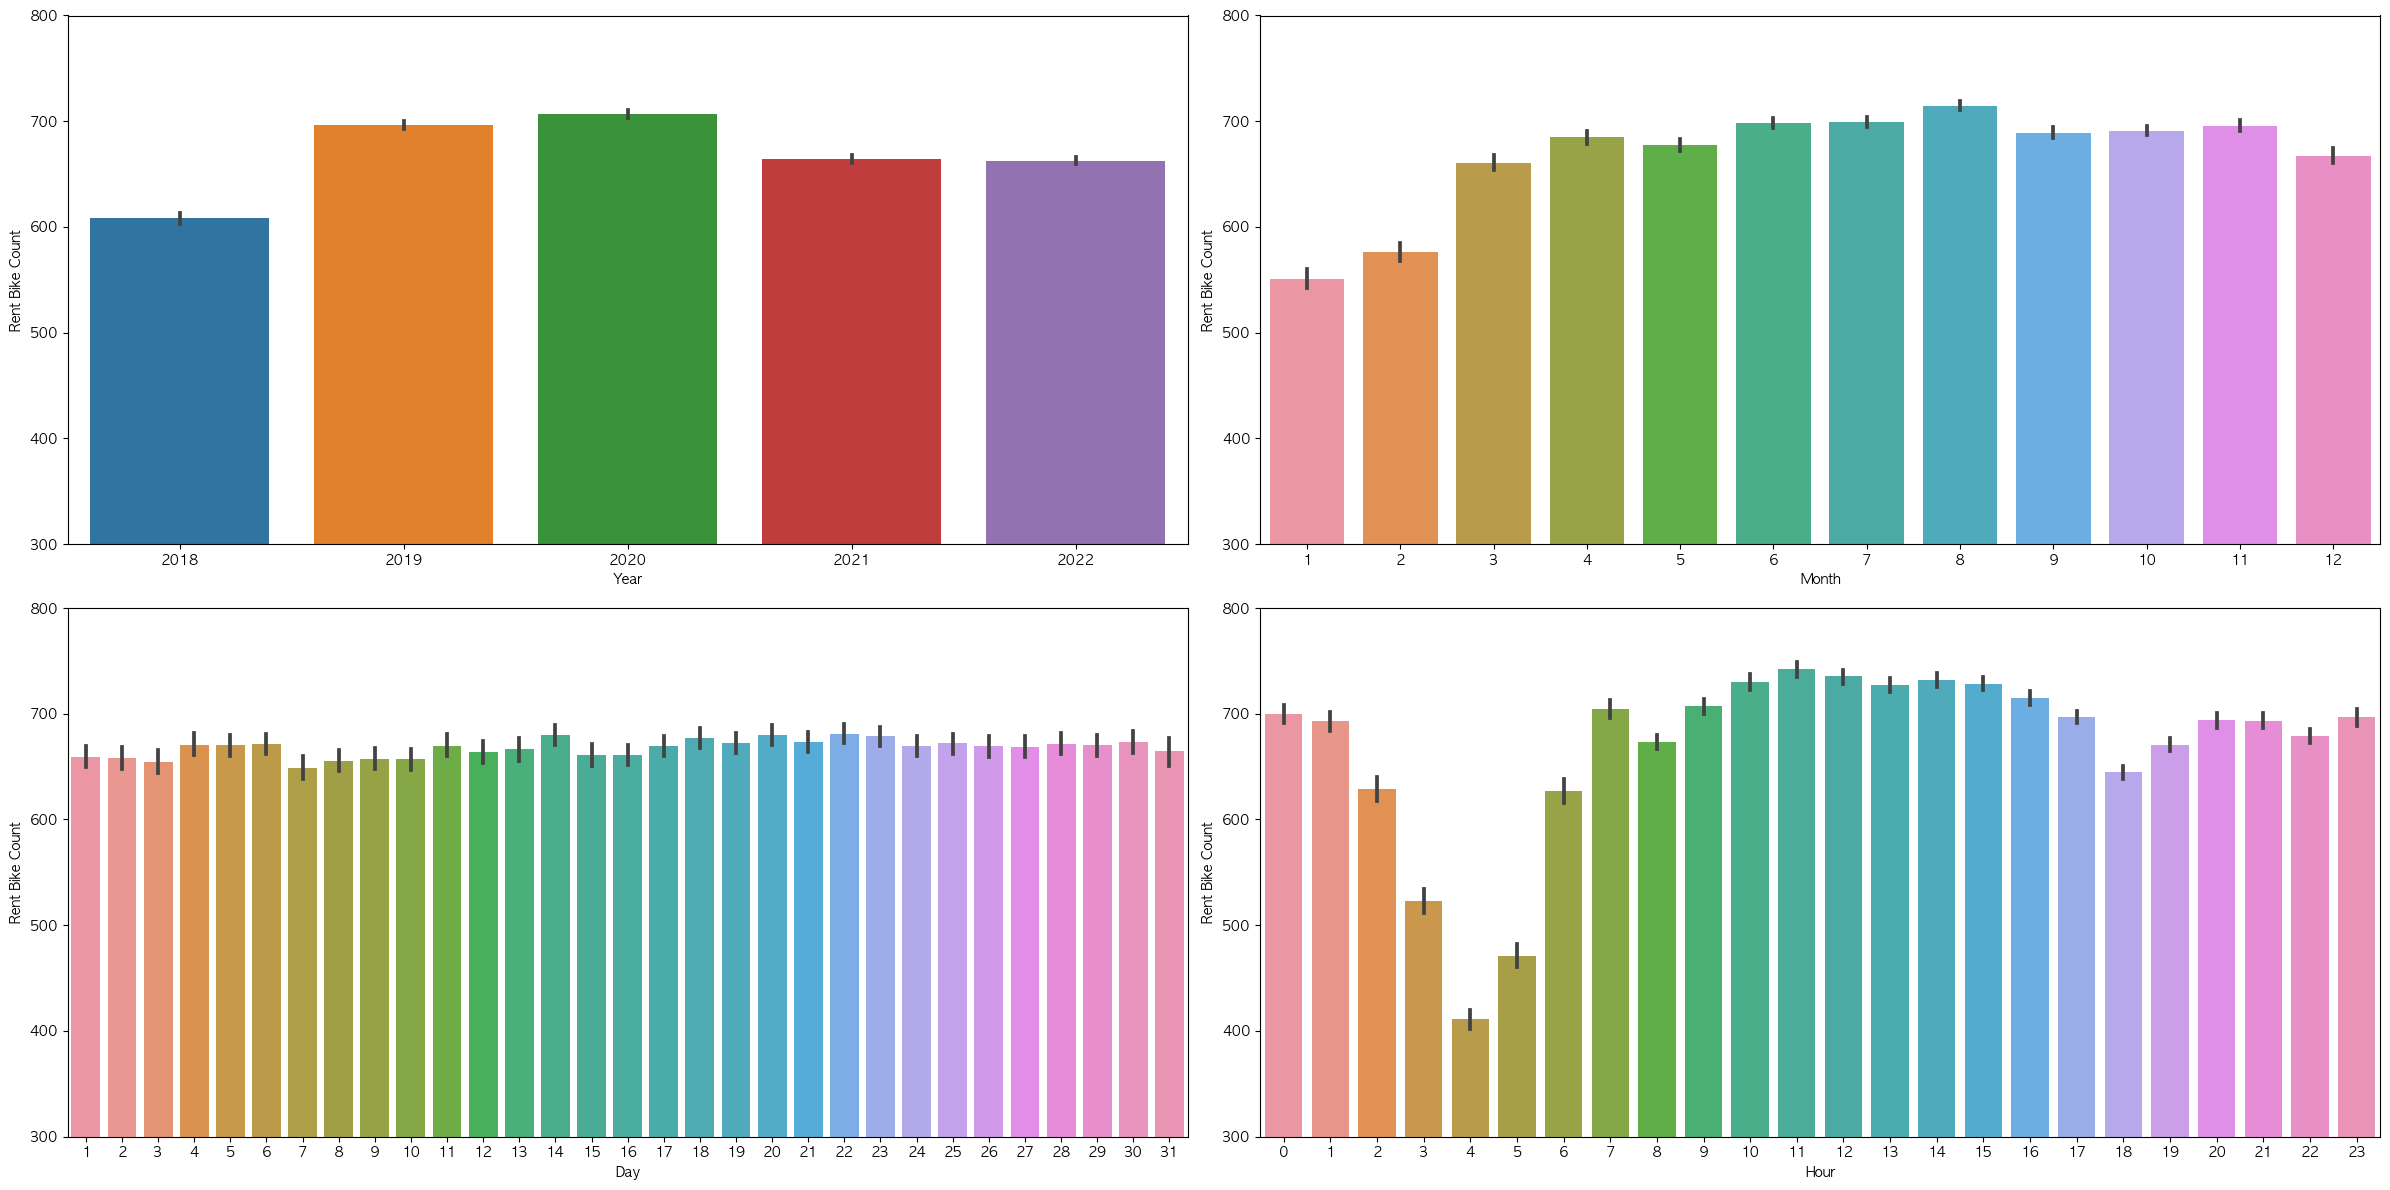

In [25]:
# 연도, 월, 일, 시간별 대여건수
fig, axes = plt.subplots(2, 2, figsize=(24,12))
cat_features = ["Year", "Month", "Day", "Hour"]

for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    sns.barplot(x=feature, y="Rent Bike Count", data=train_df, ax=axes[row, col])
    axes[row,col].set_ylim(300, 800)

plt.tight_layout()
plt.show()

##### 3.2.2 계절, 요일, 주중 및 주말, 공휴일 여부 별 대여건수
- 가을에 많이 대여를 하고 있고, 겨울에 적게 대여하고 있다는 것을 볼 수 있음
- 요일과 주중 및 주말에 따라 대여건수가 크게 차이가 없다는 것을 알 수 있음
- 공휴일 여부는 휴일이 아닌 날에 좀더 많이 대여를 하고 있다는 것을 알 수 있음

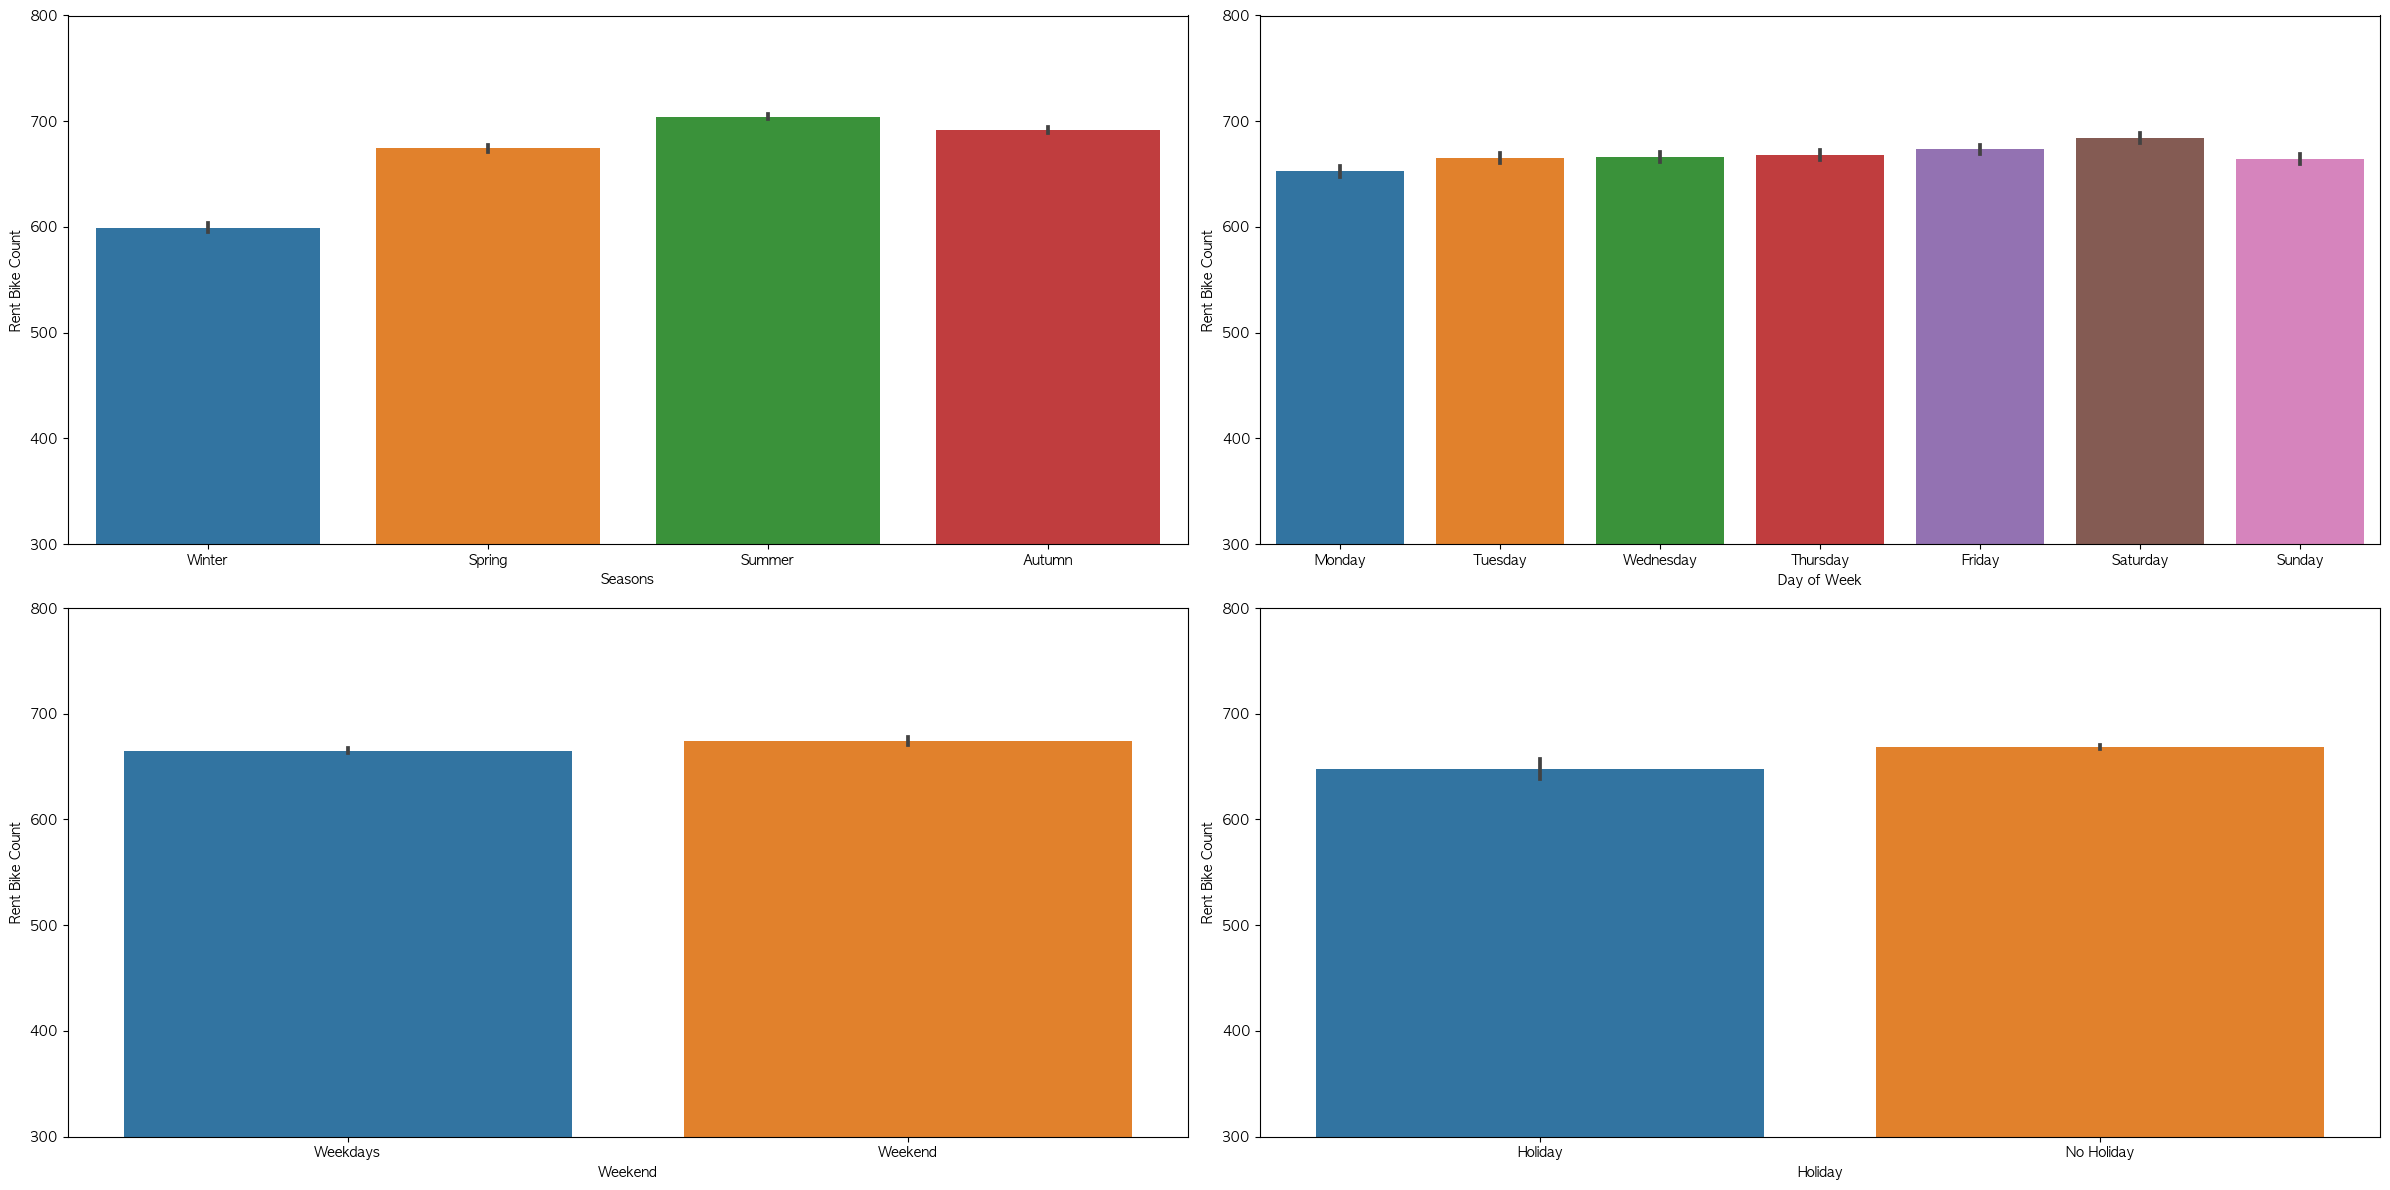

In [26]:
# 계절, 요일, 주중 및 주말, 공휴일 여부 별 대여건수
fig, axes = plt.subplots(2, 2, figsize=(24,12))
cat_features = ["Seasons", "Day of Week", "Weekend", "Holiday"]

for i, feature in enumerate(cat_features):
    row = i // 2
    col = i % 2
    sns.barplot(x=feature, y="Rent Bike Count", data=train_df, ax=axes[row, col])
    axes[row,col].set_ylim(300, 800)

plt.tight_layout()
plt.show()

##### 3.2.3 전체 대여수, 계절별, 시간대별, 공휴일 여부에 따른 대여수
- 전체 대여수 데이터에 이상치가 있다는 것을 알 수 있음
- 계절, 시간, 공휴일 여부 데이터에서도 이상치가 있는 것으로 보여 이상치 처리 후, 다시 시각화를 해야 함.

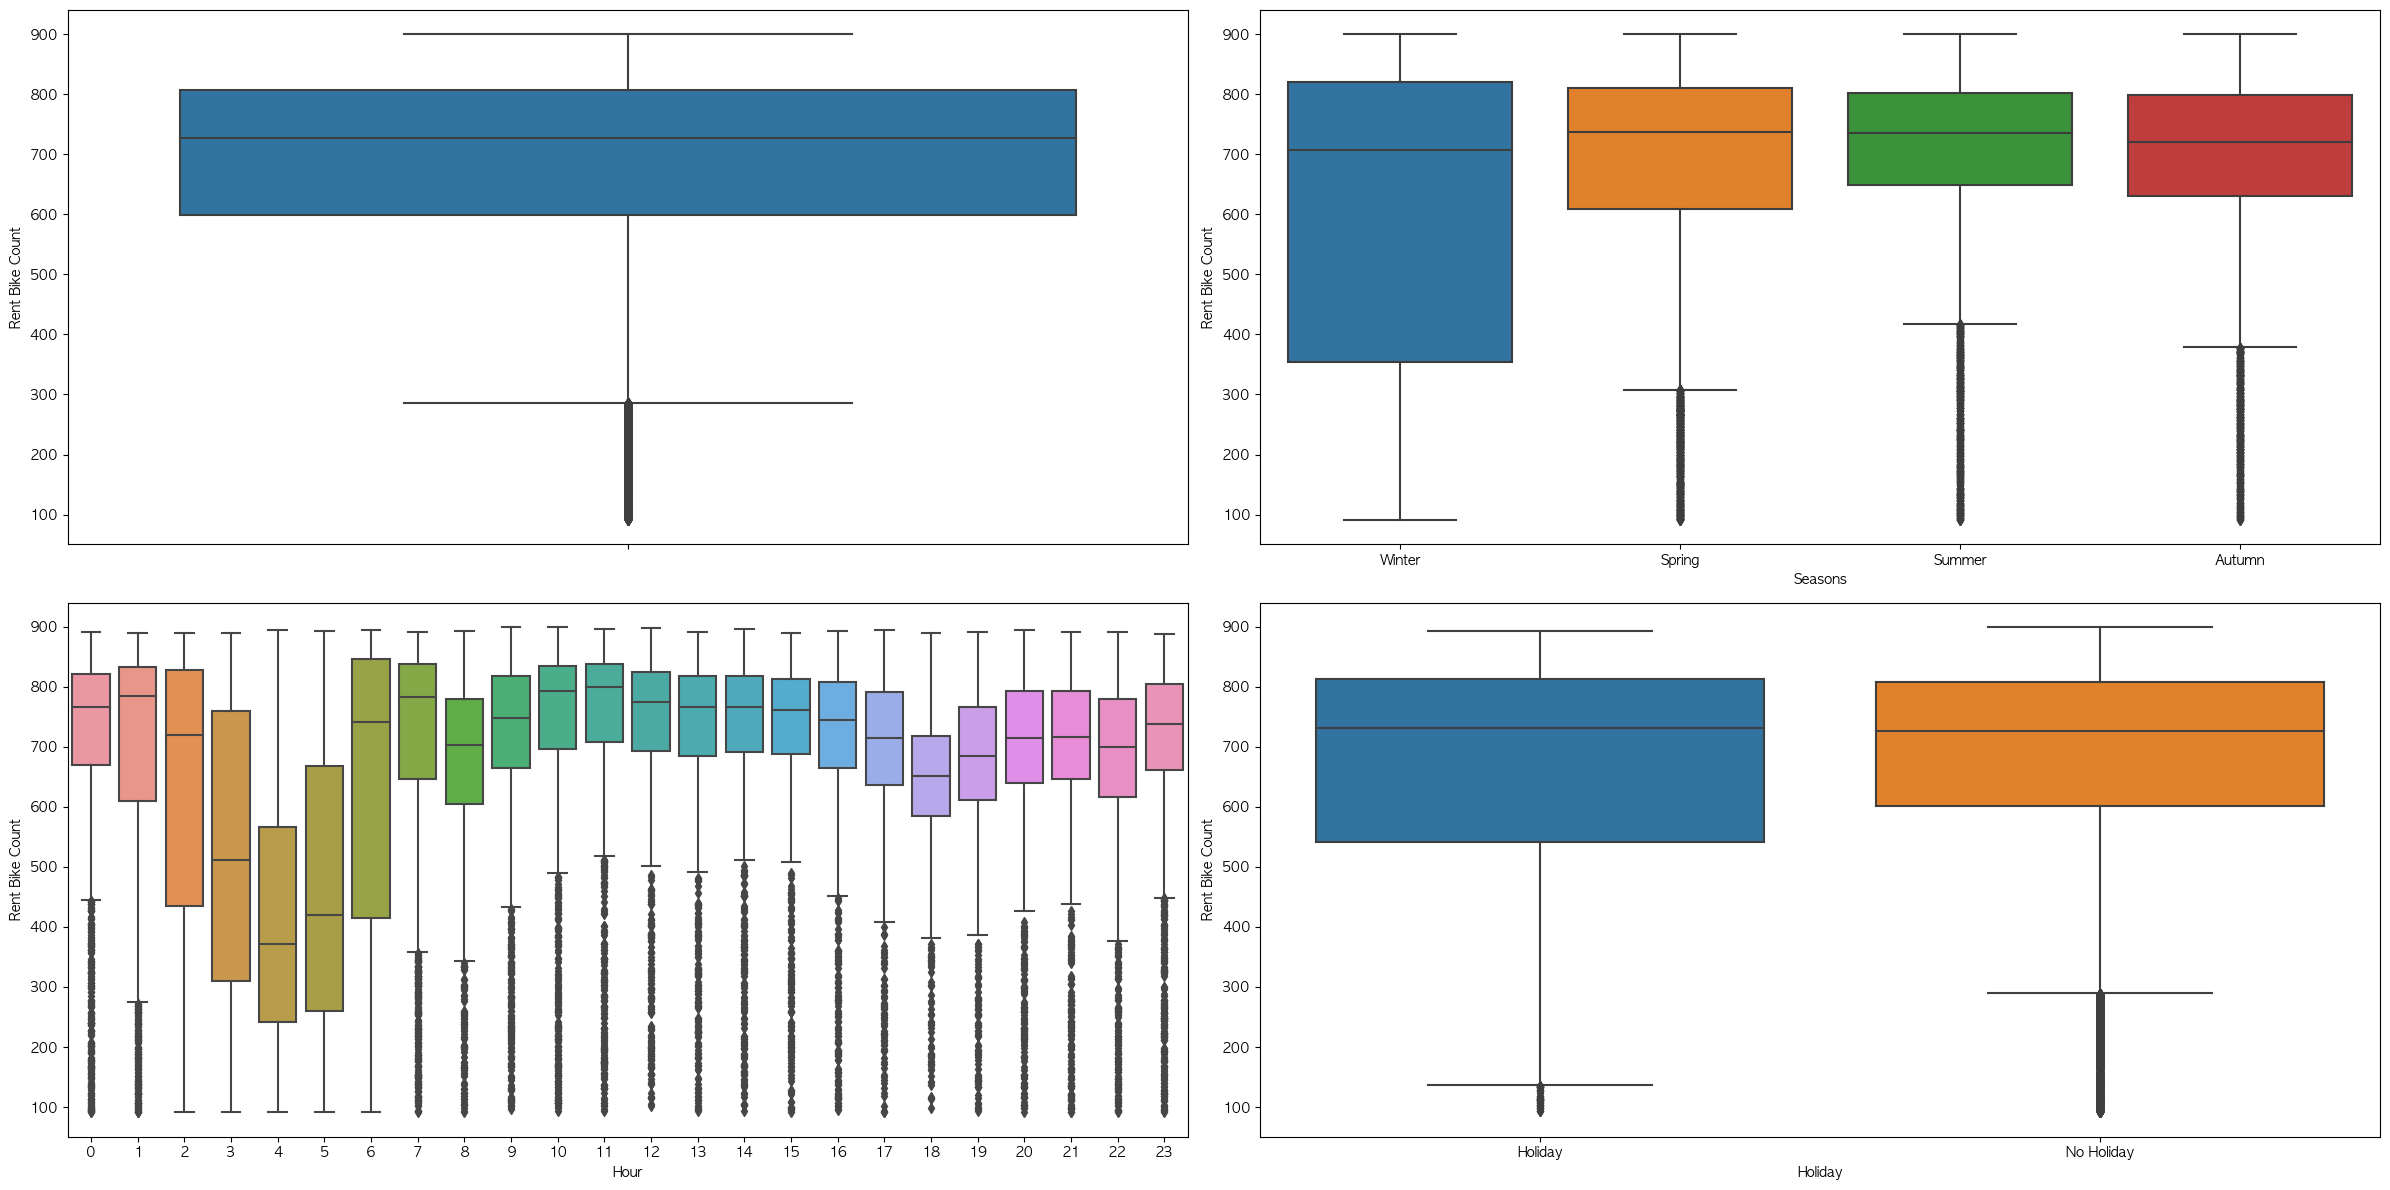

In [57]:
# 전체 대여수, 계절별, 시간대별, 공휴일 여부에 따른 대여수
fig, axes = plt.subplots (nrows=2, ncols=2)
fig.set_size_inches (24, 12)

sns.boxplot(data=train_df, y="Rent Bike Count", orient="v", ax=axes[0][0])
sns.boxplot(data=train_df, y="Rent Bike Count", x="Seasons", orient="v", ax=axes[0][1])
sns.boxplot(data=train_df, y="Rent Bike Count", x="Hour", orient="v", ax=axes[1][0])
sns.boxplot(data=train_df, y="Rent Bike Count", x="Holiday",orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Rent Bike Count')
axes[0][1].set(xlabel='Seasons', ylabel='Rent Bike Count')
axes[1][0].set(xlabel='Hour', ylabel='Rent Bike Count')
axes[1][1].set(xlabel='Holiday', ylabel='Rent Bike Count')

plt.tight_layout()
plt.show()

##### 3.2.4 여러 조건들과 시간대별 대여건수 - 계절, 요일, 주중 및 주말, 휴일

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


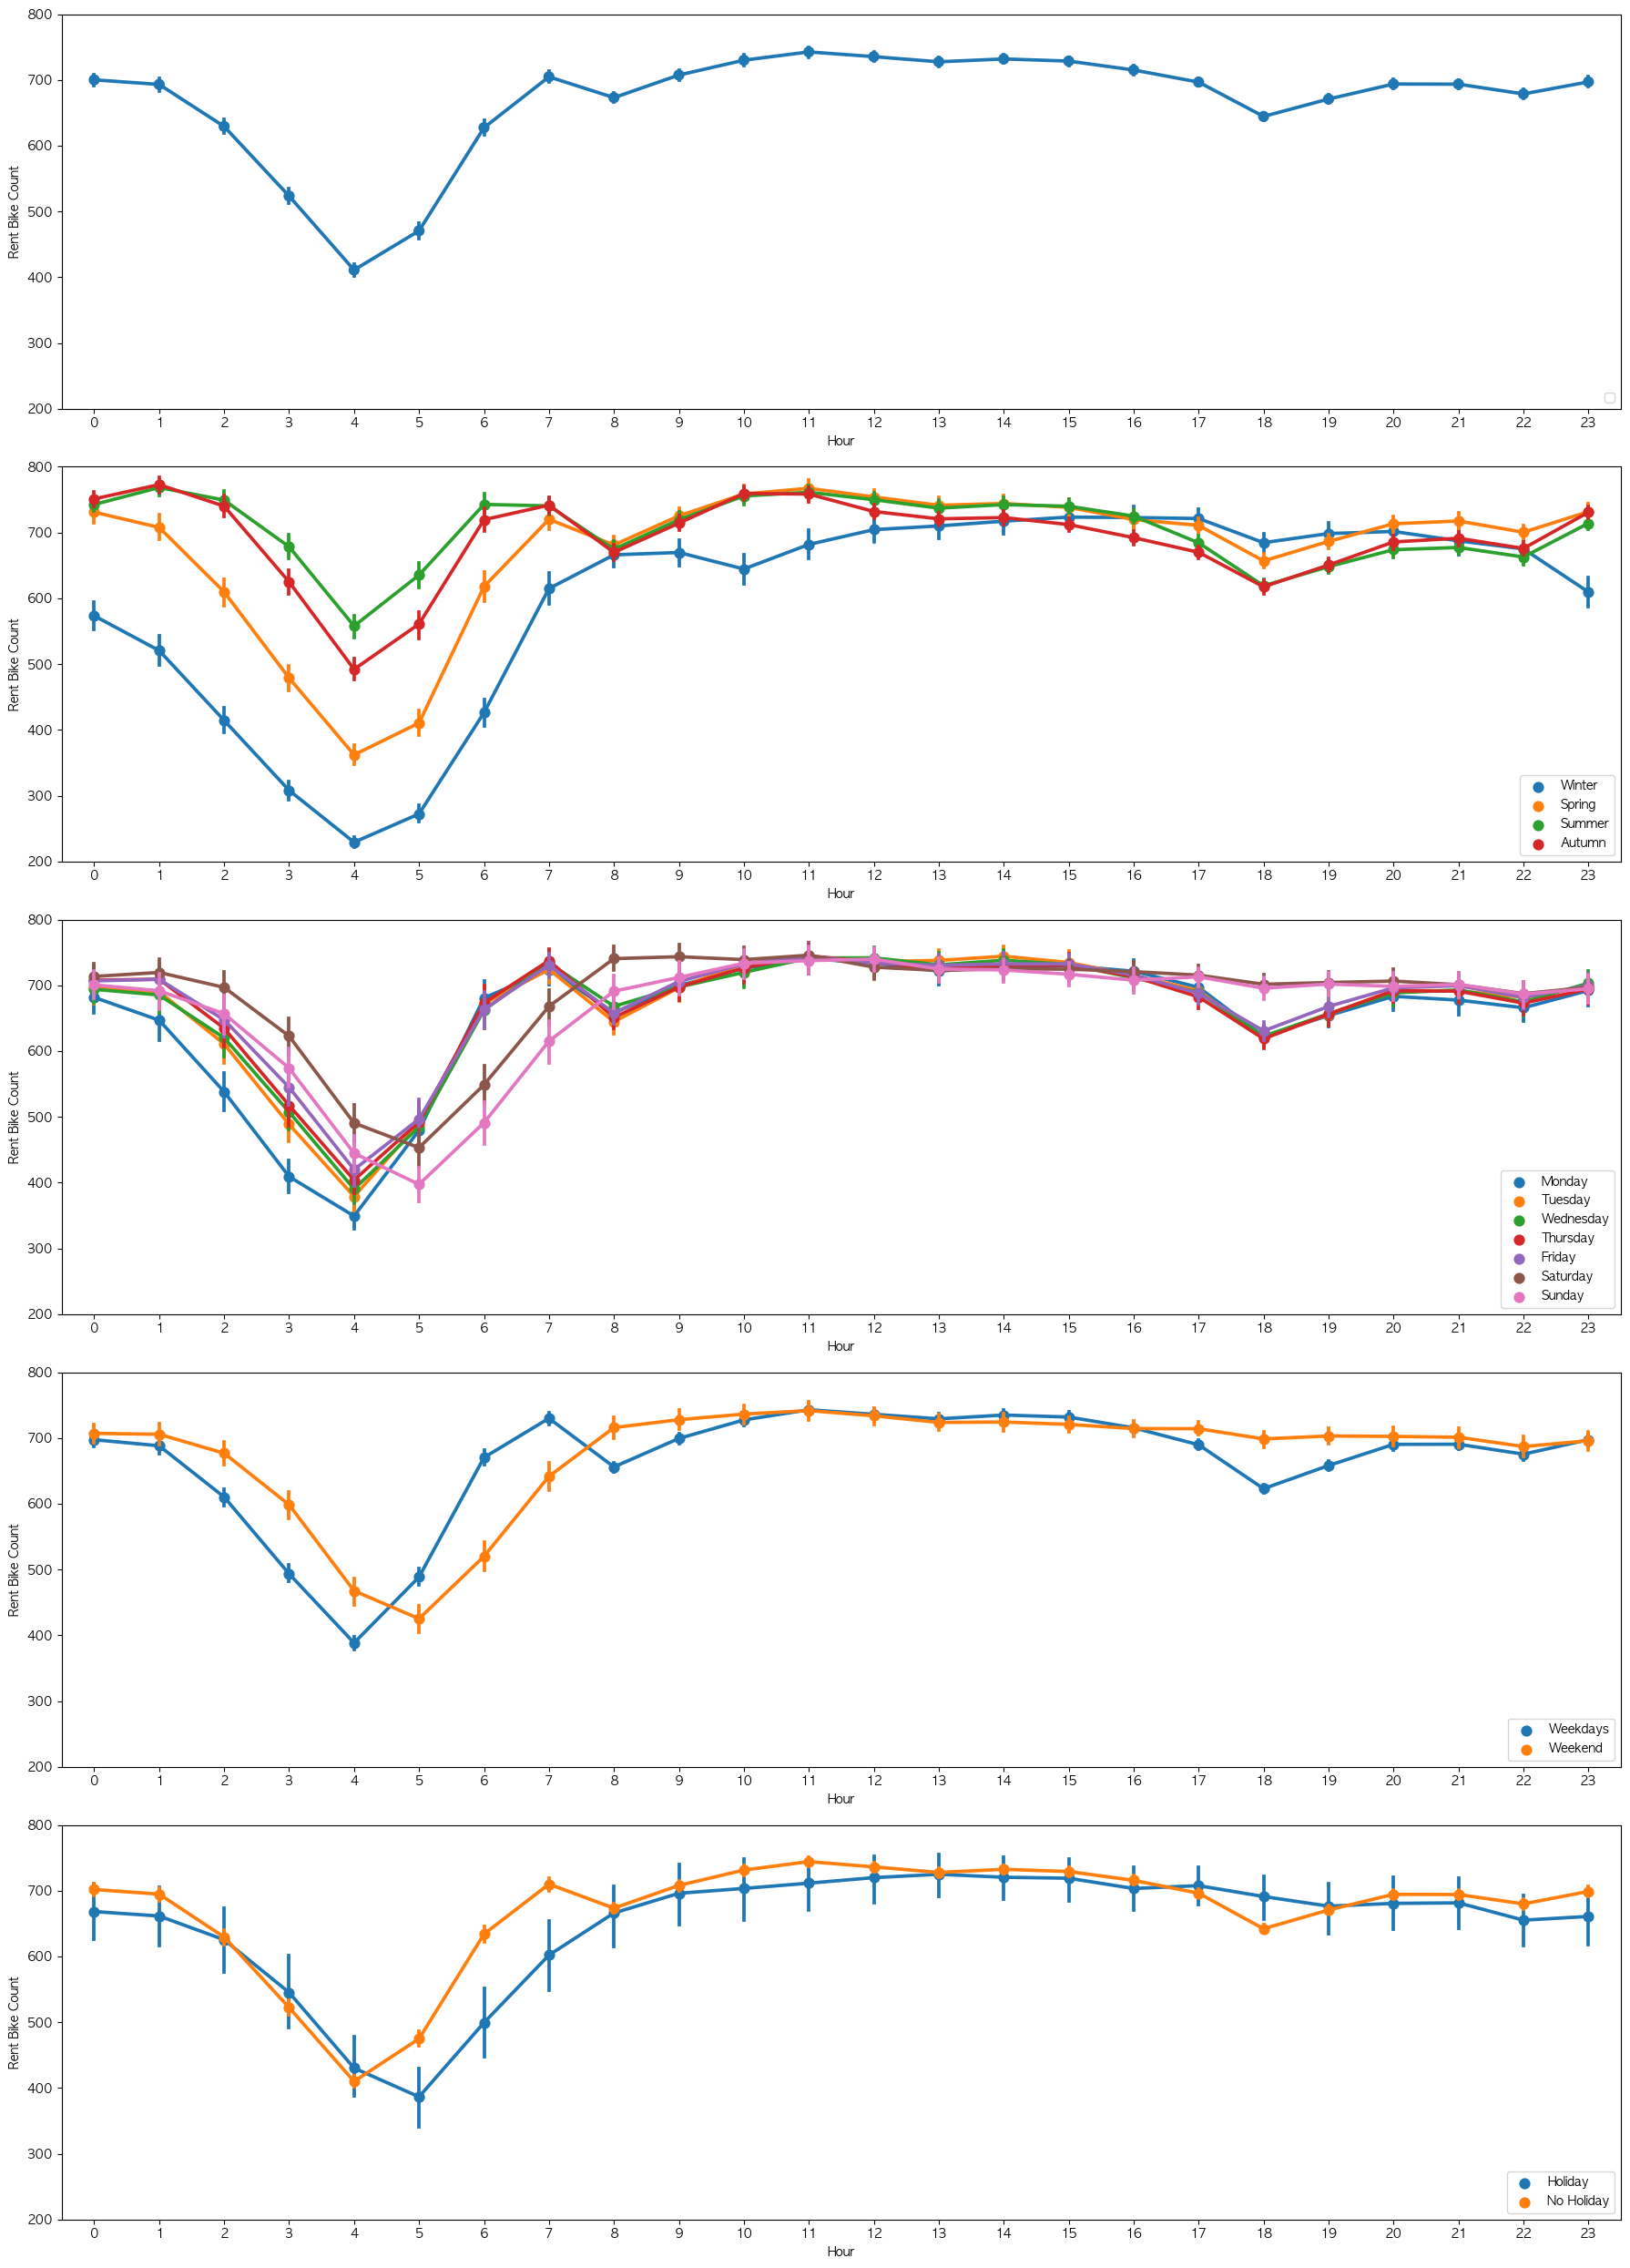

In [27]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", ax=ax1)
sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", hue="Seasons", ax=ax2)
sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", hue="Day of Week", ax=ax3)
sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", hue="Weekend", ax=ax4)
sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", hue="Holiday", ax=ax5)

for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.set_ylim(top=800, bottom=200)
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

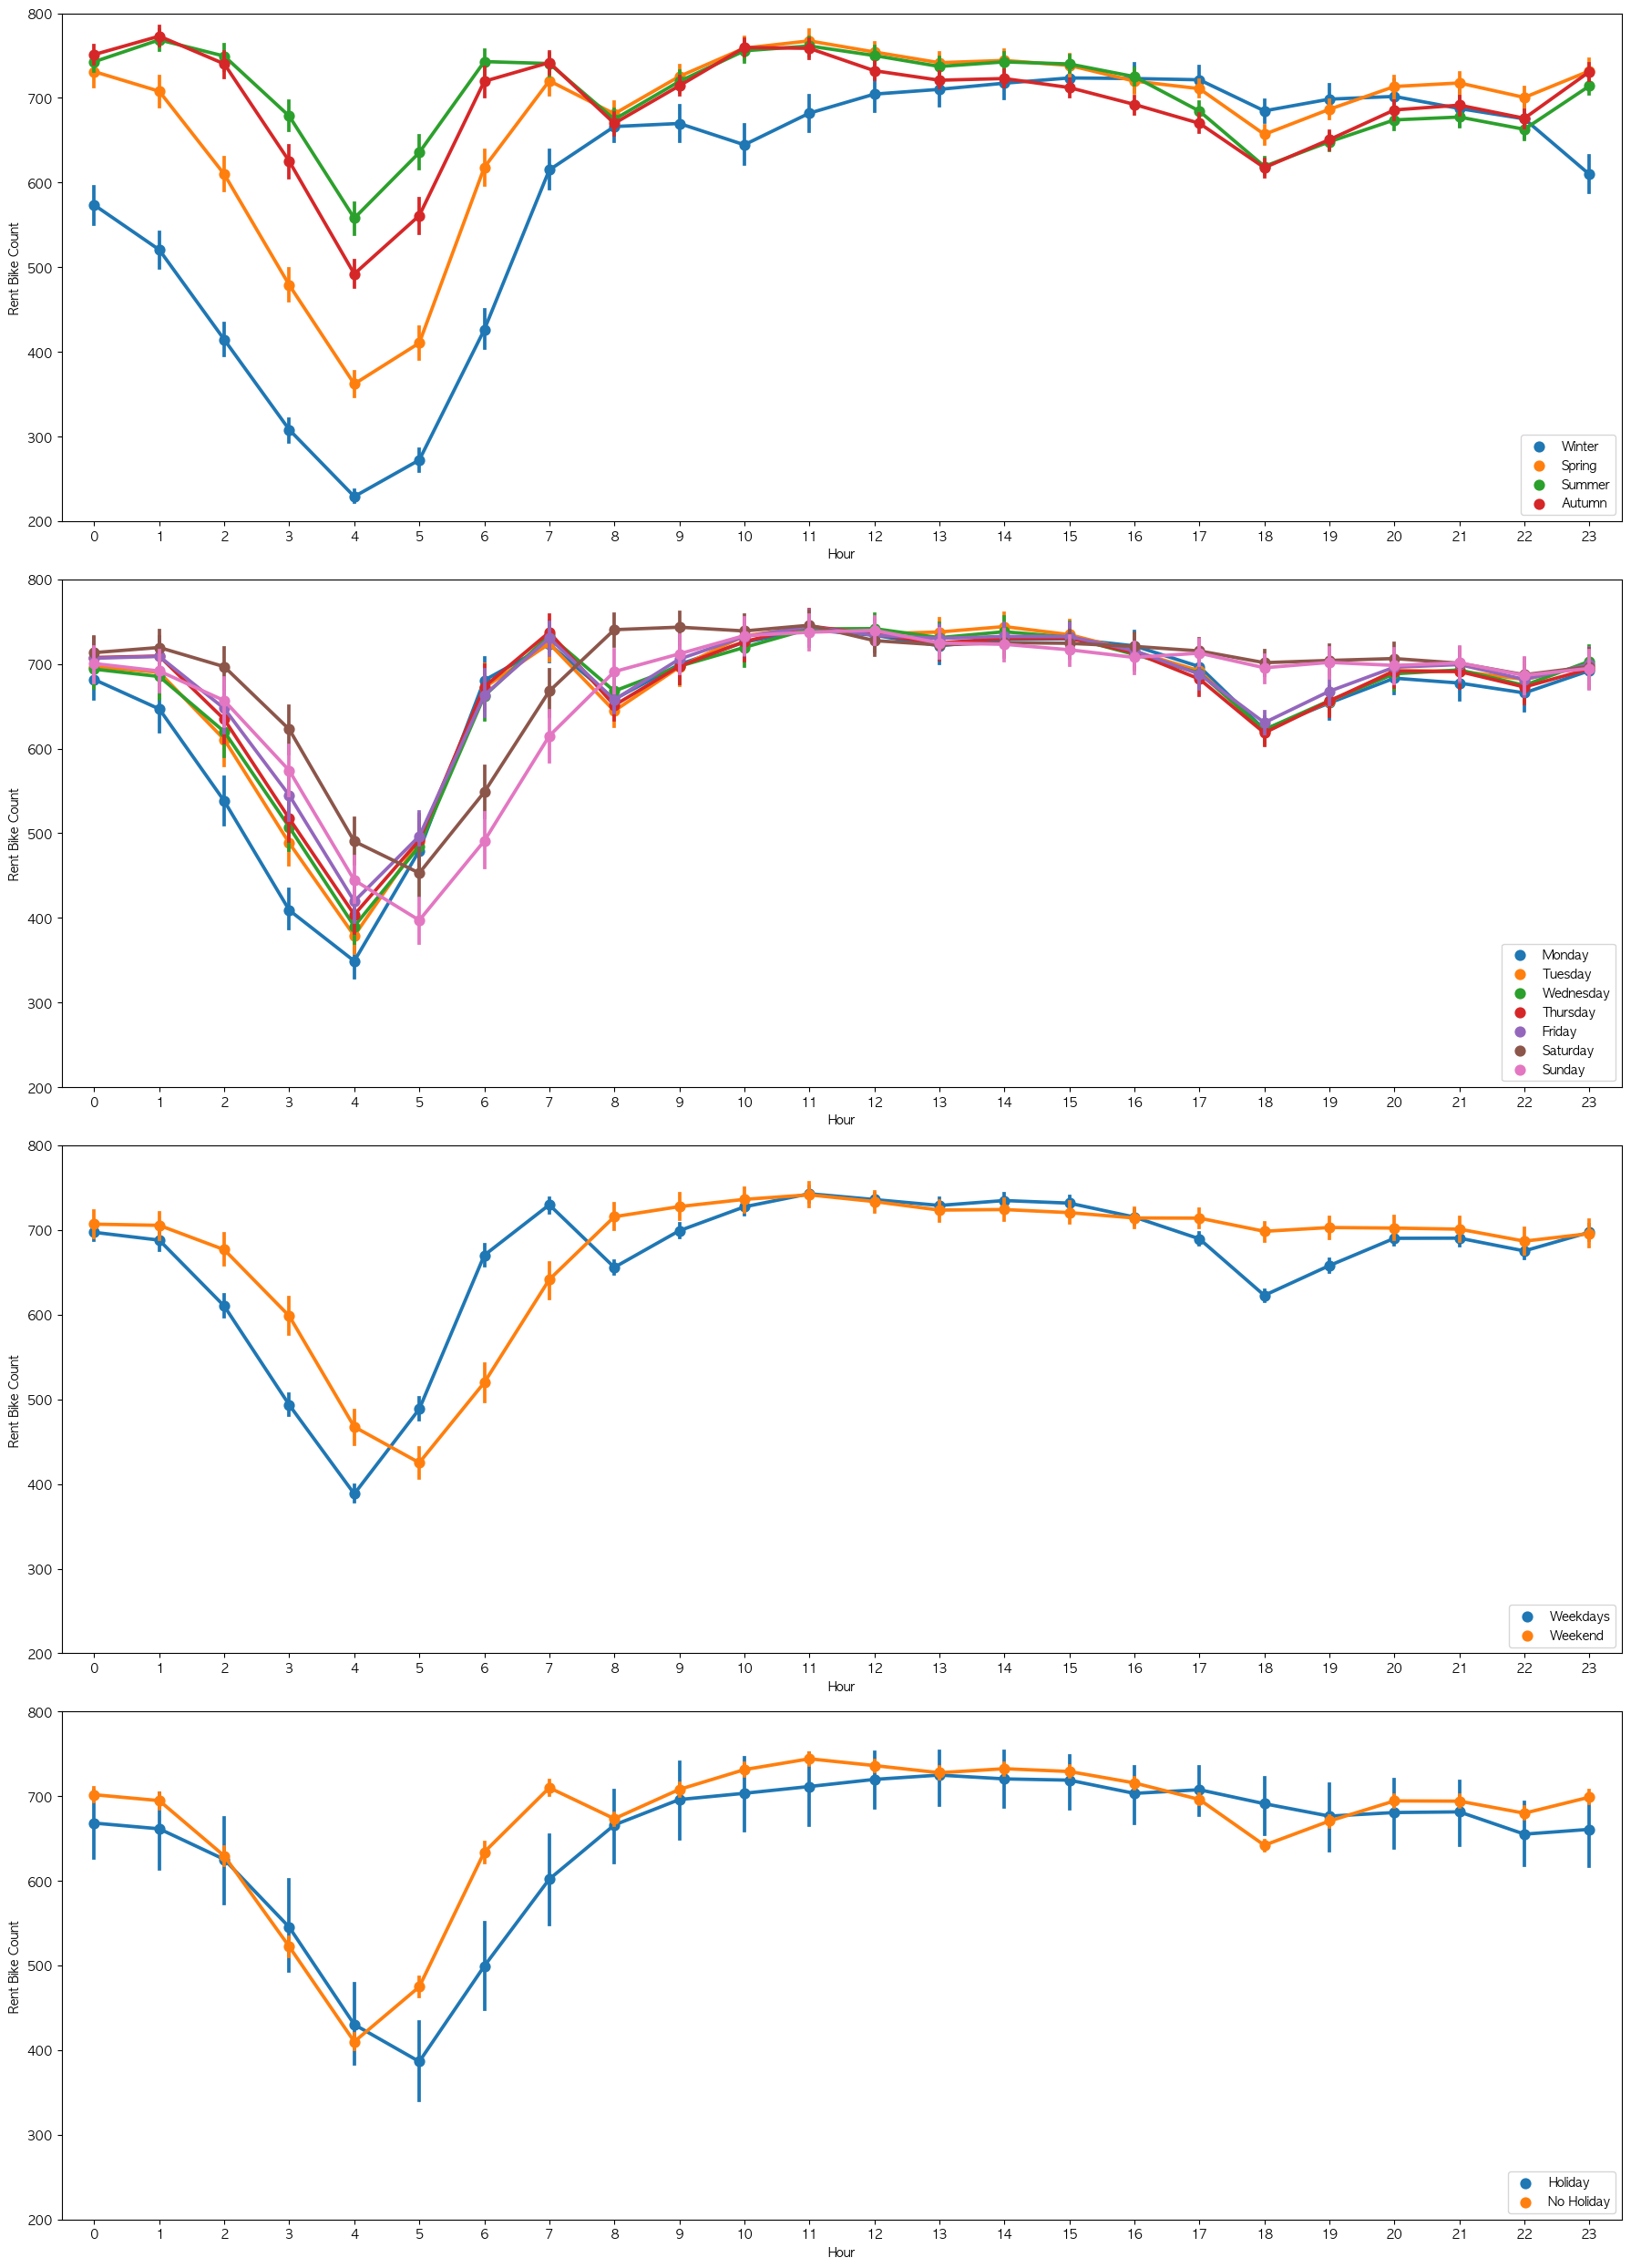

In [29]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4)
fig.set_size_inches(18,25)

sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", hue="Seasons", ax=ax1)
sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", hue="Day of Week", ax=ax2)
sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", hue="Weekend", ax=ax3)
sns.pointplot(data=train_df, x="Hour", y="Rent Bike Count", hue="Holiday", ax=ax4)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(top=800, bottom=200)
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### 3.3 상관관계 시각화

##### 3.3.1 Heatmap()
- 기온과 분당 평균기온, 분당 최고기온, 분당 최저기온 간에는 상관관계가 높아 같이 피처로 사용하기에 적합하지 않다.
- 풍향과 분당 최다 풍향, 풍속과 분당 평균풍속, 분당 최대풍속 간에는 상관관계가 높아 같이 피처로 사용하기에 적합하지 않다.
- 상대습도와 분당 평균습도, 분당 최대습도, 분당 최저습도 간에는 상관관계가 높아 같이 피처로 사용하기에 적합하지 않다.
- 기압과 분당 평균기압, 분당 최고기압, 분당 최저기압 간에는 상관관계가 높아 같이 피처로 사용하기에 적합하지 않다.

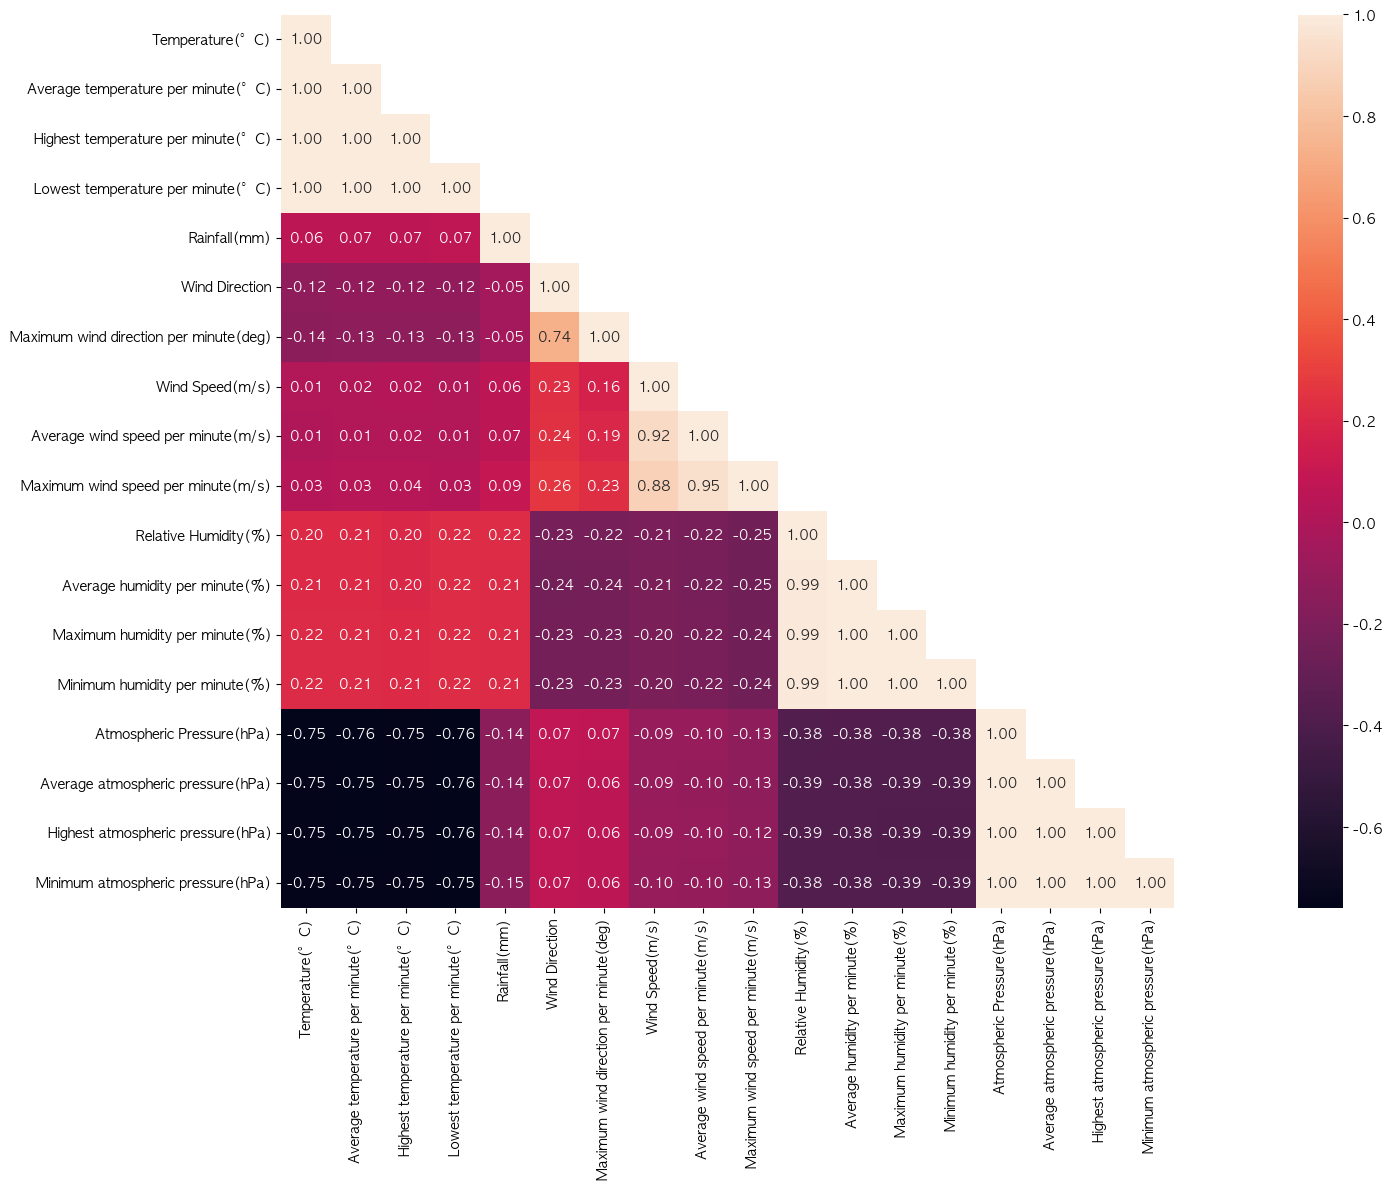

In [61]:
corr_df = df[['Temperature(°C)', 'Average temperature per minute(°C)',
       'Highest temperature per minute(°C)',
       'Lowest temperature per minute(°C)', 'Rainfall(mm)', 'Wind Direction',
       'Maximum wind direction per minute(deg)', 'Wind Speed(m/s)',
       'Average wind speed per minute(m/s)',
       'Maximum wind speed per minute(m/s)', 'Relative Humidity(%)',
       'Average humidity per minute(%)', 'Maximum humidity per minute(%)',
       'Minimum humidity per minute(%)', 'Atmospheric Pressure(hPa)',
       'Average atmospheric pressure(hPa)',
       'Highest atmospheric pressure(hPa)',
       'Minimum atmospheric pressure(hPa)']]

corr_df = corr_df.corr()
mask = np.array(corr_df)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(25,12)
sns.heatmap(corr_df, mask=mask, annot=True, square=True, fmt='.2f')

plt.tight_layout()
plt.show()

##### 3.3.2 Regplot()
- 기온은 온도가 증가할수록 대여건수가 증가한다는 것을 알 수 있다.
- 강수량은 강한 음의 상관관계를 가지고 있다는 것을 알 수 있다.
- 풍속, 기압은 상관관계를 가지고 있다고 볼 수 없다.
- 상대습도는 습도가 증가할수록 대여건수가 감소하는 음의 상관관계를 가지는 것을 알 수 있다.

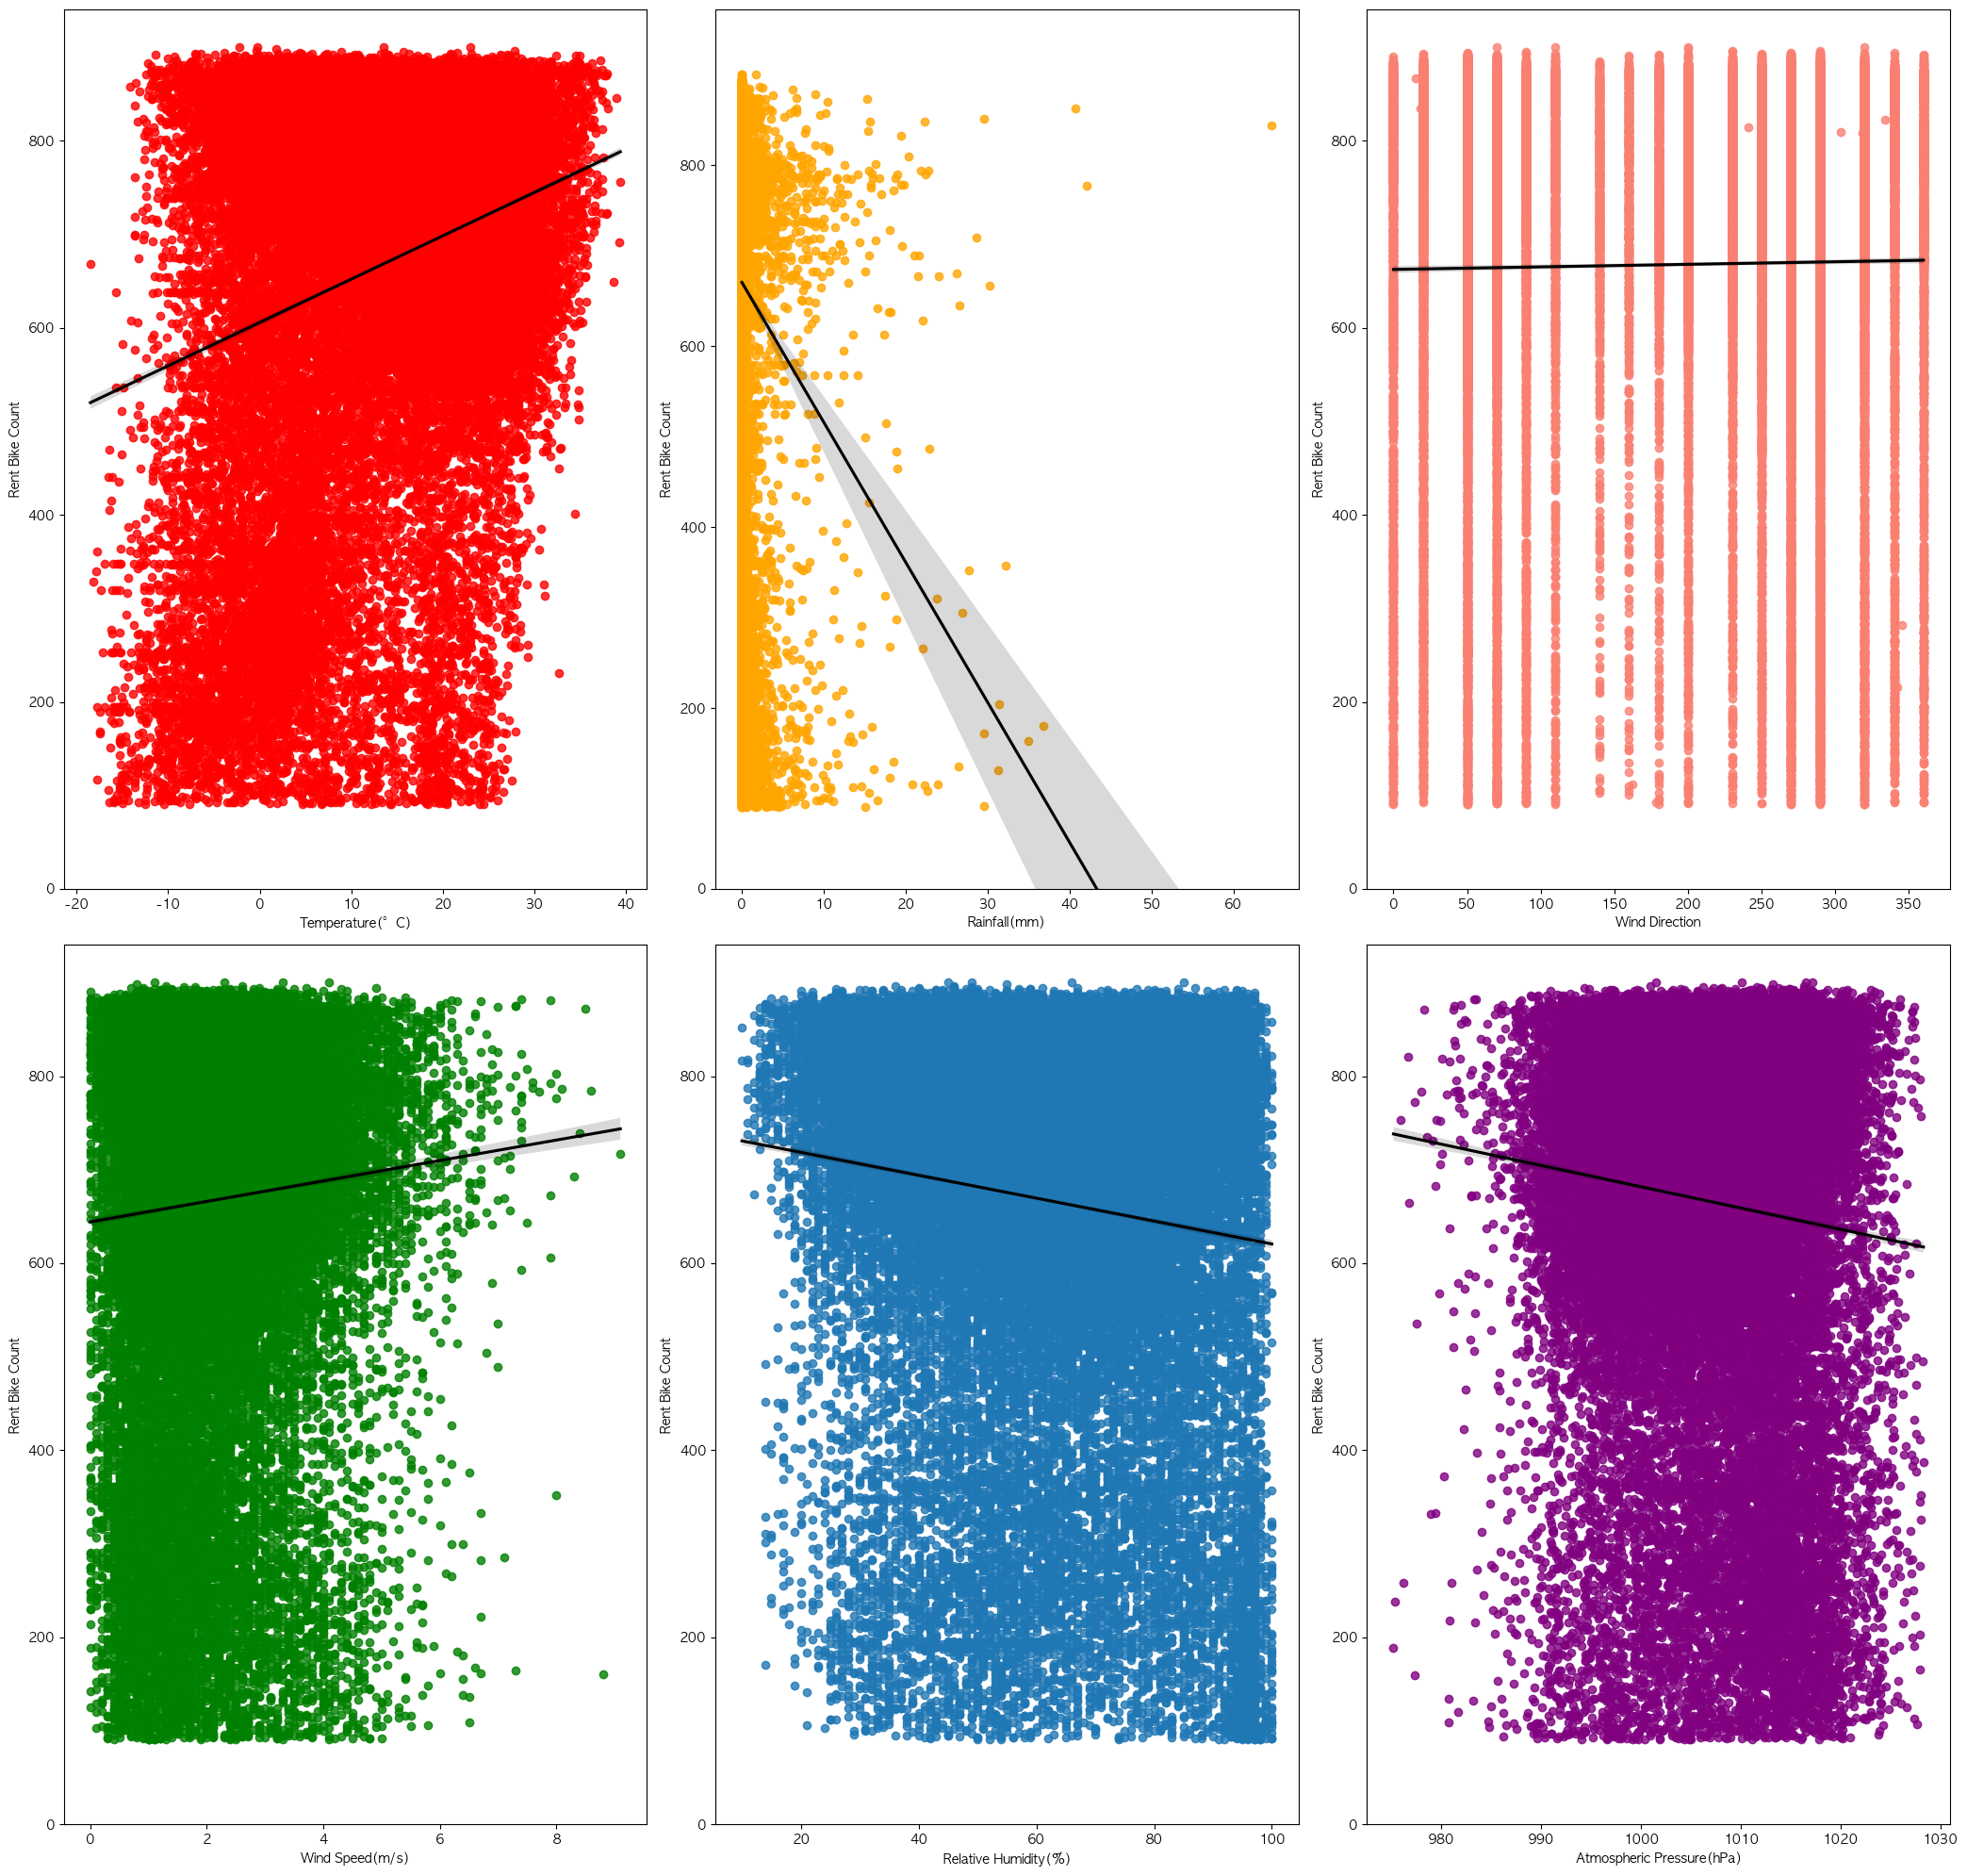

In [60]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols=3, nrows=2)
fig.set_size_inches(21,20)

sns.regplot(x="Temperature(°C)", y="Rent Bike Count", data=train_df, ax=ax1, color="Red", line_kws={"color": "Black"})
sns.regplot(x="Rainfall(mm)", y="Rent Bike Count", data=train_df, ax=ax2, color="Orange", line_kws={"color": "Black"})
sns.regplot(x="Wind Direction", y="Rent Bike Count", data=train_df, ax=ax3, color="Salmon", line_kws={"color": "Black"})
sns.regplot(x="Wind Speed(m/s)", y="Rent Bike Count", data=train_df, ax=ax4, color="Green", line_kws={"color": "Black"})
sns.regplot(x="Relative Humidity(%)", y="Rent Bike Count", data=train_df, ax=ax5, line_kws={"color": "Black"})
sns.regplot(x="Atmospheric Pressure(hPa)", y="Rent Bike Count", data=train_df, ax=ax6, color="Purple", line_kws={"color": "Black"})

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.set_ylim(0, None)

plt.tight_layout()
plt.show()